In [7]:
from channel import *
import tda 
client = tda.auth.client_from_token_file('kiran.json', config.TD_CLIENT_ID)
import matplotlib.dates
import sys,os
import numpy as np

Falling Wedge Finder

False
buy;  0
AAL


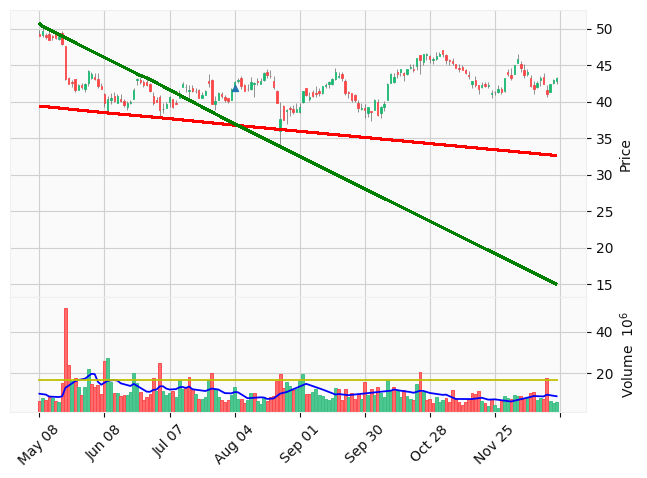

False
buy;  1
AAL


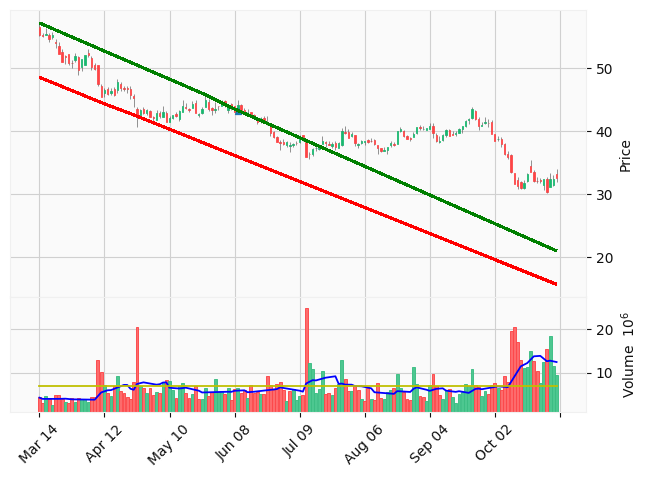

False
buy;  0
AAL


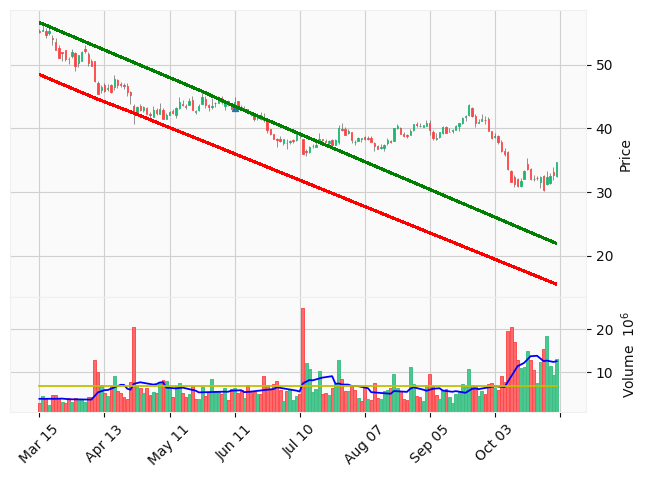

False
buy;  0
AAL


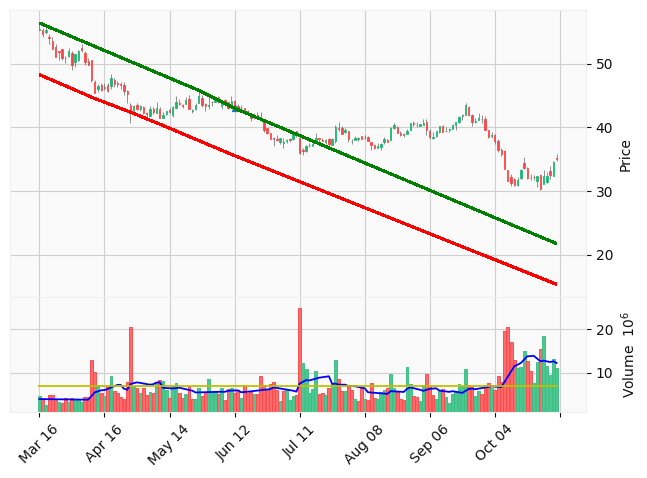

False
buy;  1
AAL


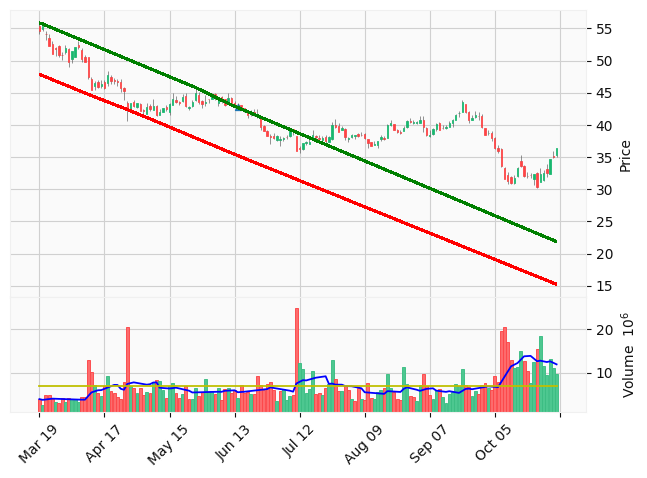

False
buy;  0
AAL


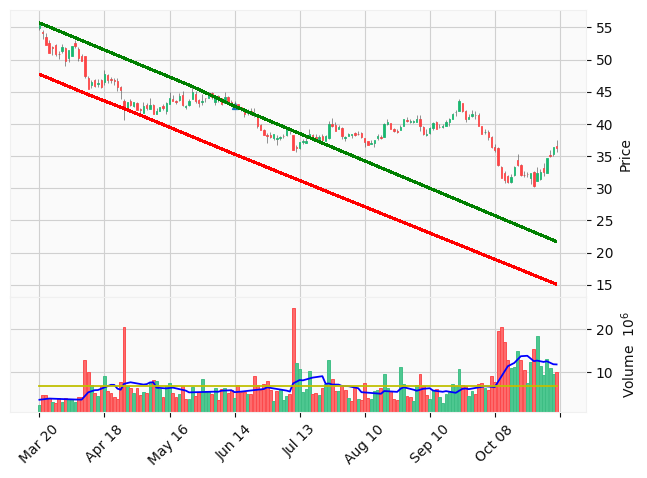

False
AAL


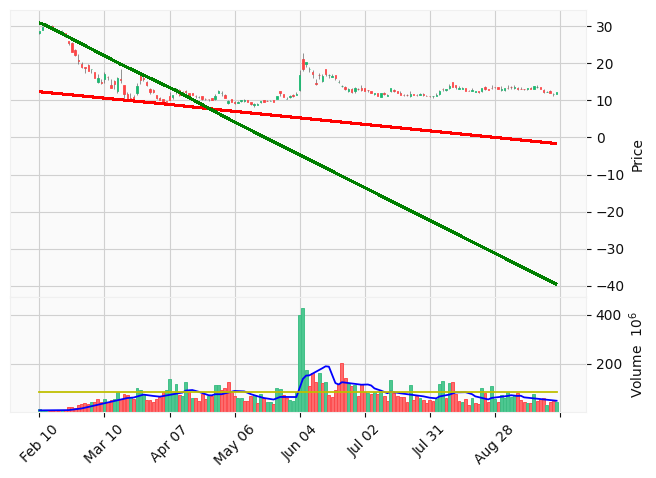

False
AAL


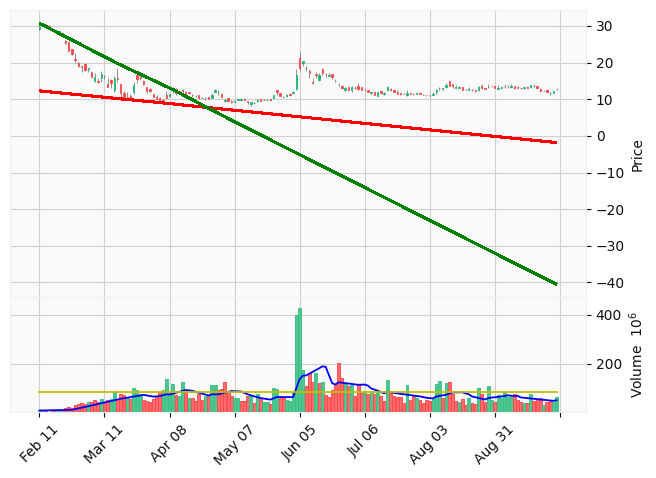

False
AAL


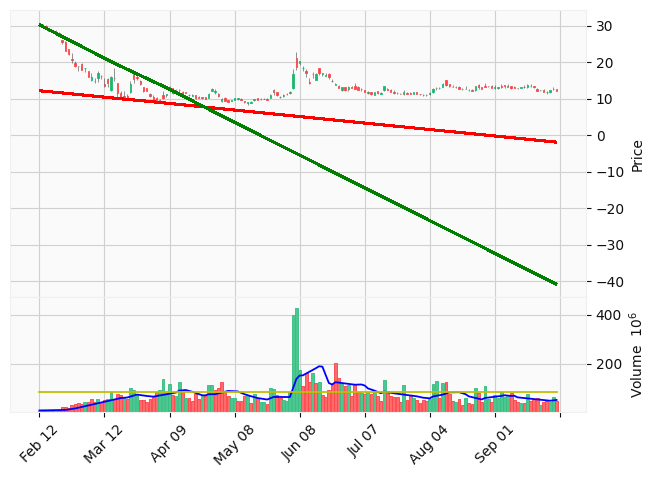

False
AAL


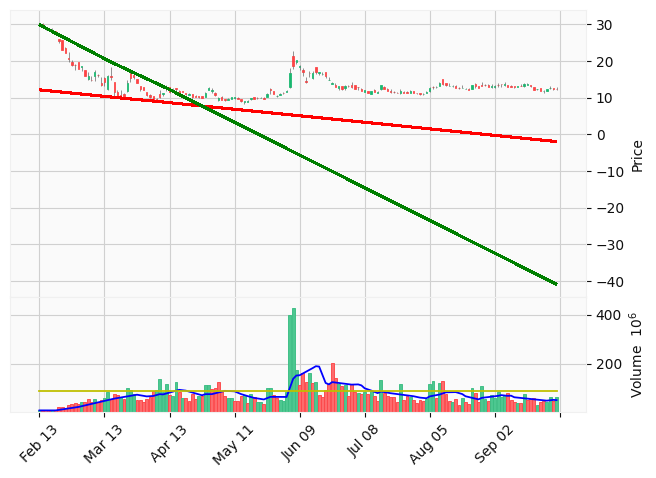

False
buy;  0
AAL


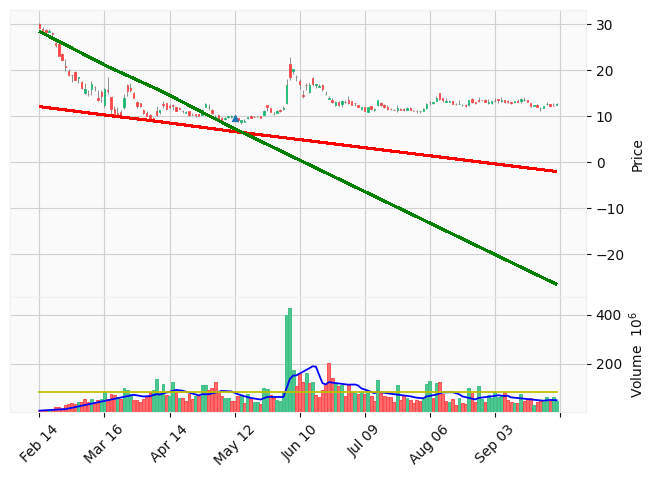

False
buy;  0
AAL


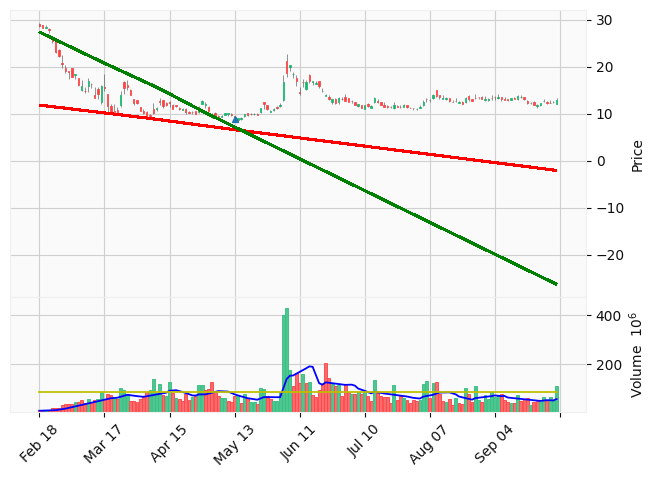

False
buy;  0
AAL


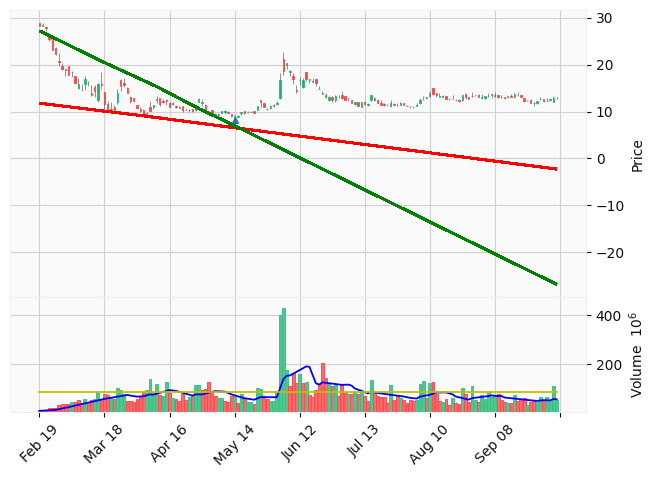

False
buy;  0
AAL


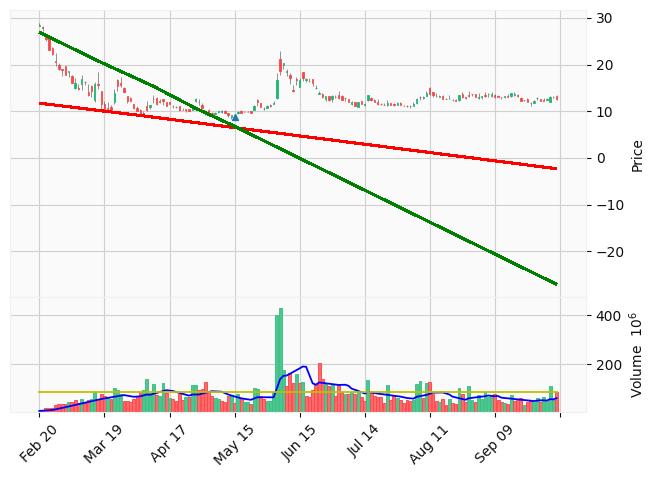

False
buy;  0
AAL


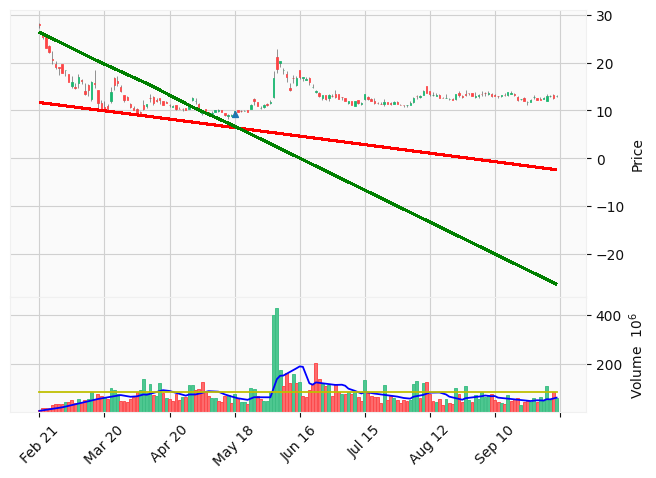

False
buy;  0
AAL


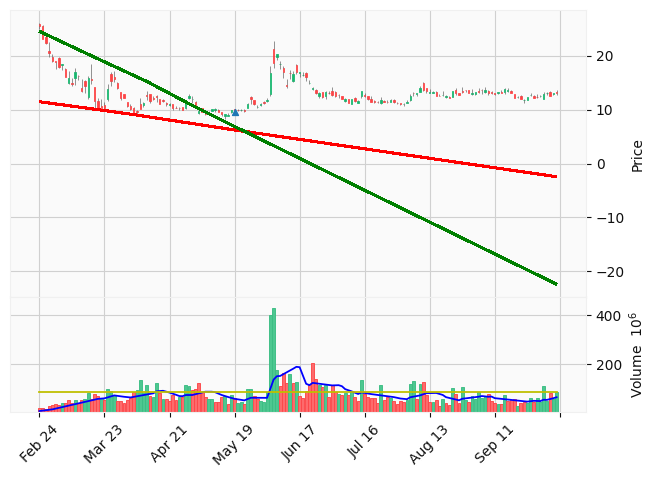

False
buy;  0
AAL


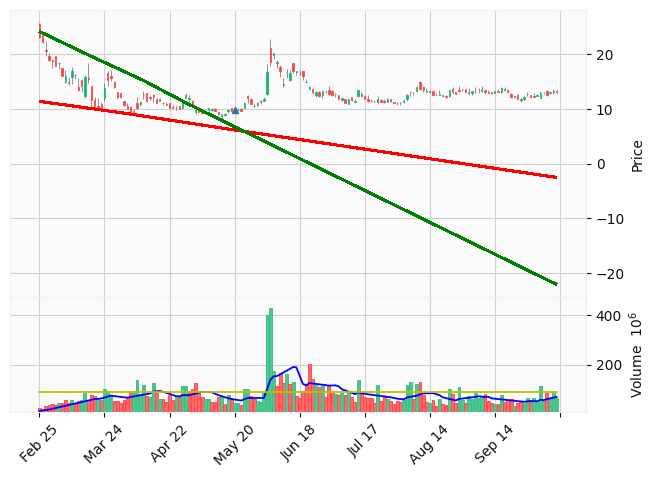

False
buy;  0
AAL


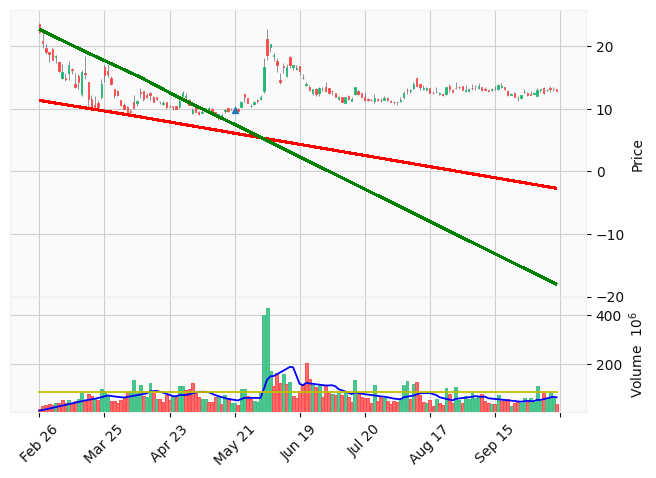

False
buy;  0
AAL


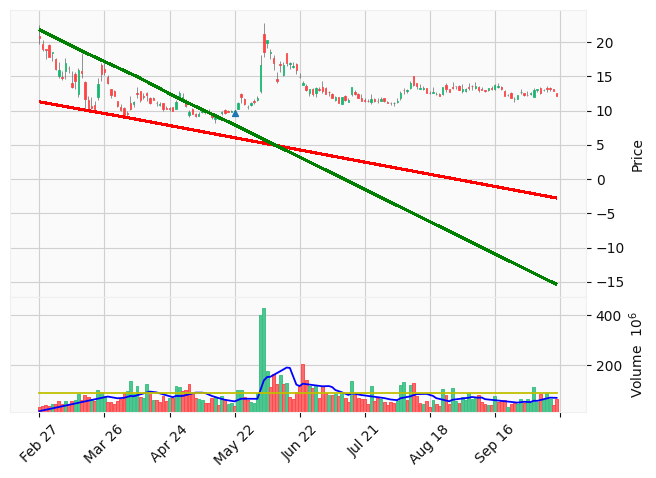

False
buy;  0
sell:  9
AAL


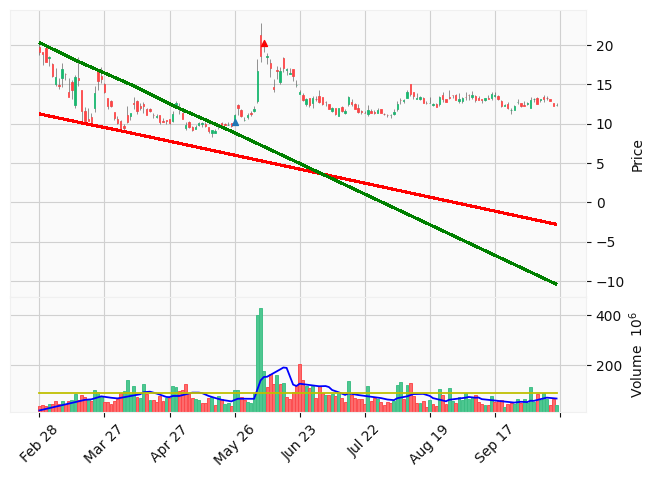

False
buy;  0
sell:  7
AAL


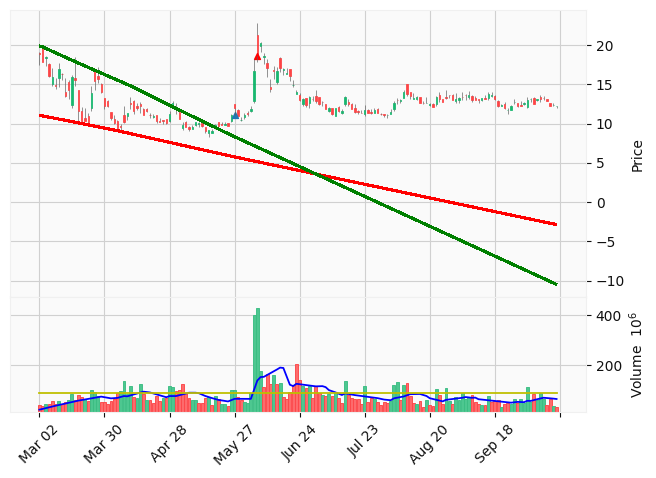

False
buy;  0
sell:  6
AAL


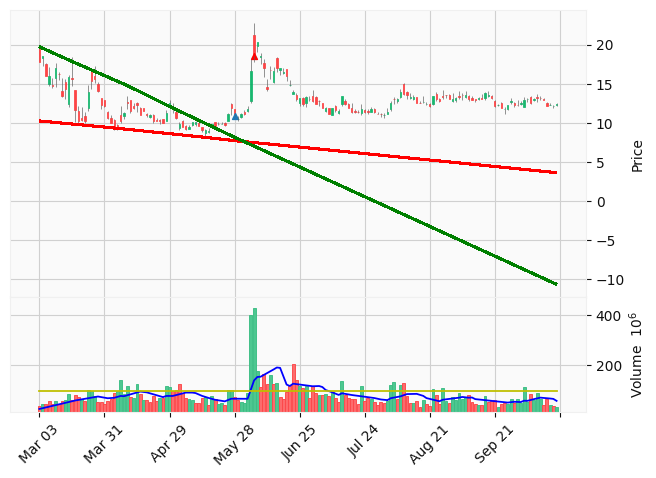

False
buy;  0
AAL


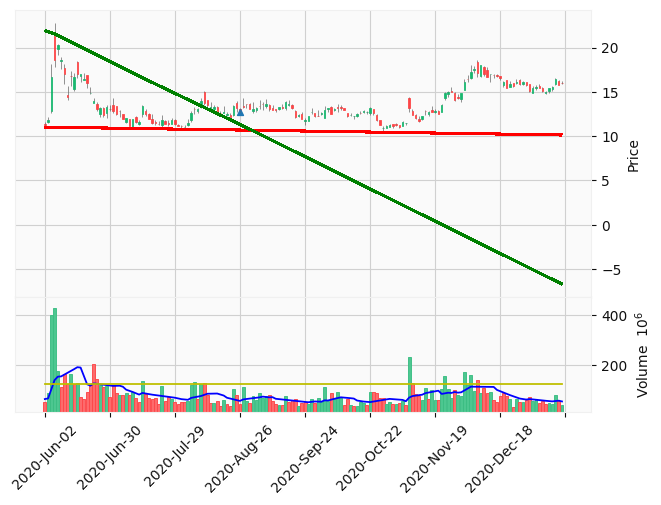

False
buy;  0
AAL


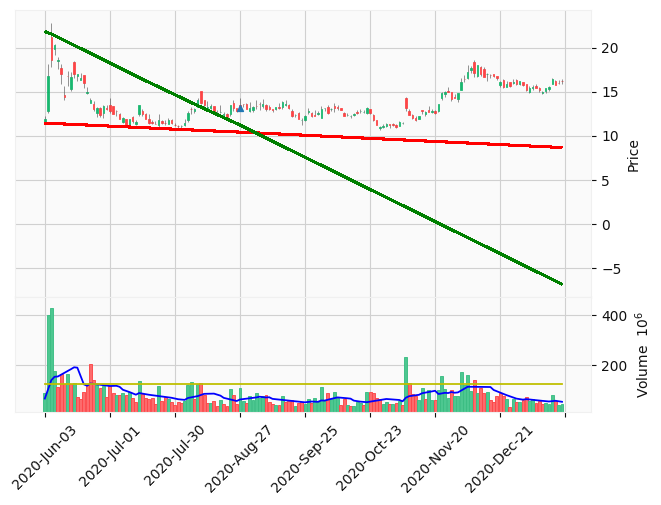

False
buy;  0
AAL


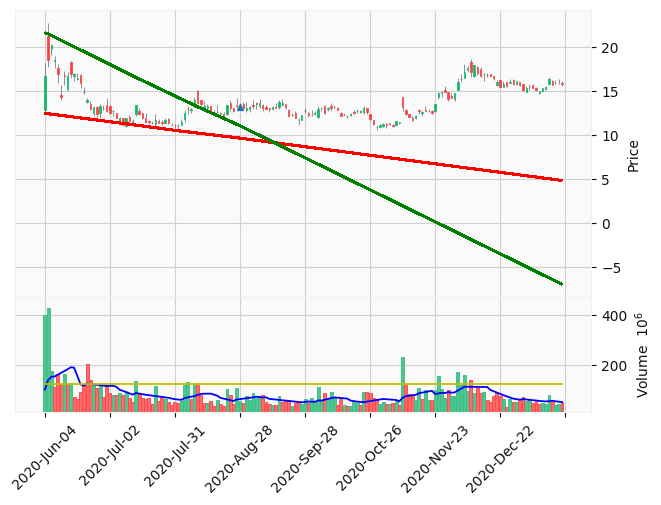

False
buy;  0
AAL


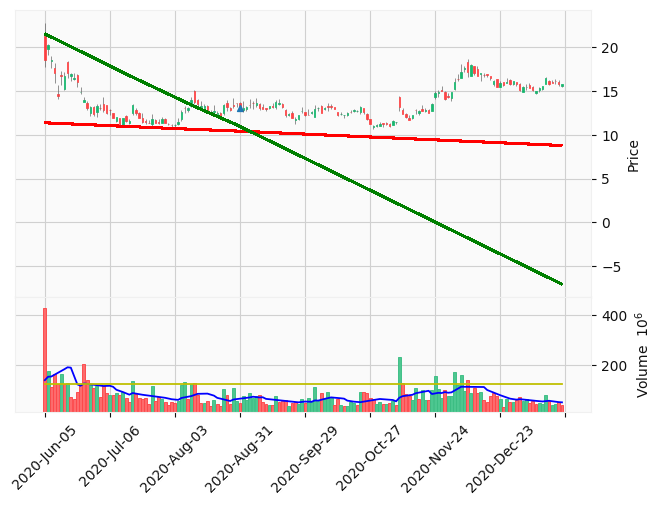

False
buy;  0
AAL


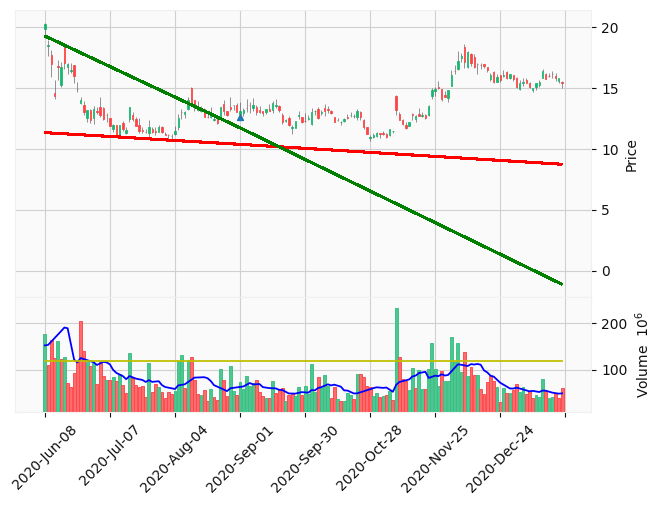

False
buy;  20
sell:  55
AAL


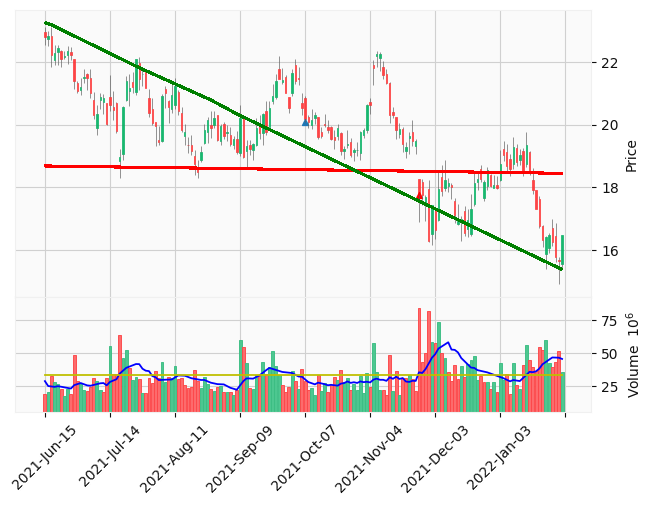

False
buy;  19
sell:  41
AAL


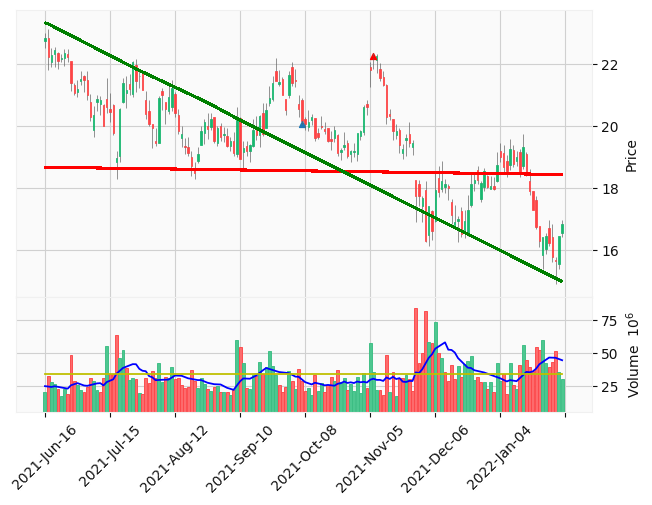

False
buy;  18
sell:  40
AAL


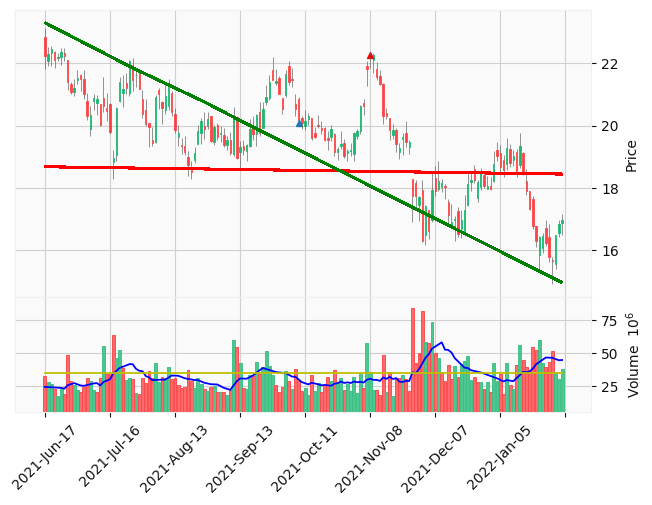

False
AAL


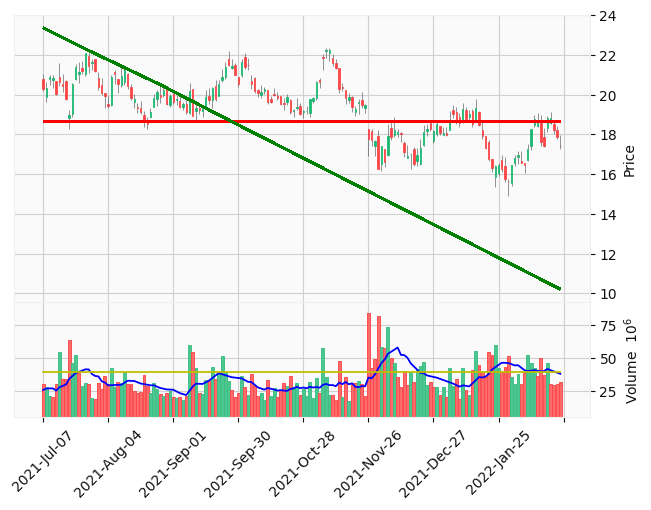

False
AAL


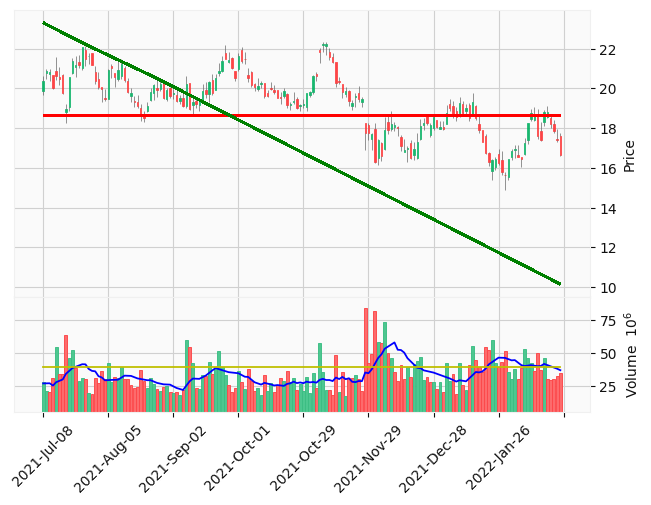

False
AAL


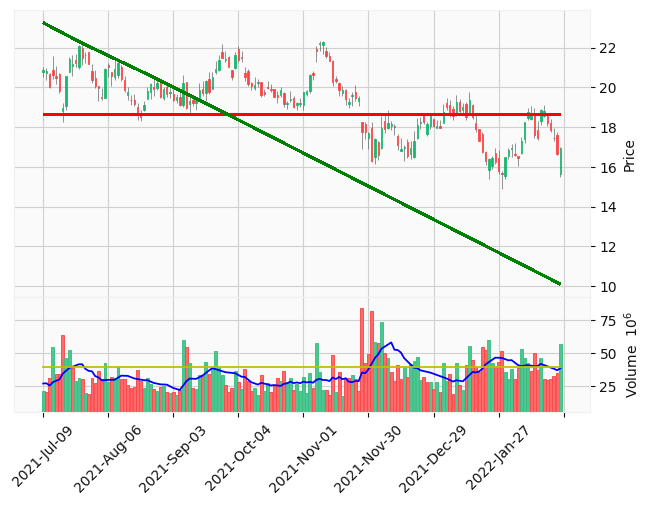

False
AAL


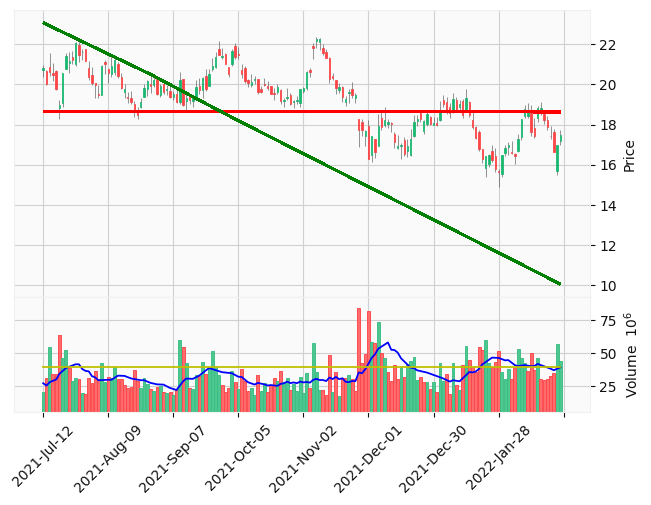

False
AAL


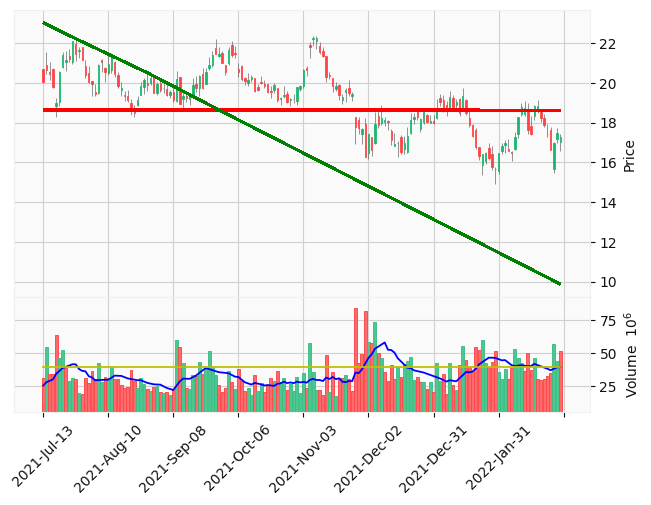

False
AAL


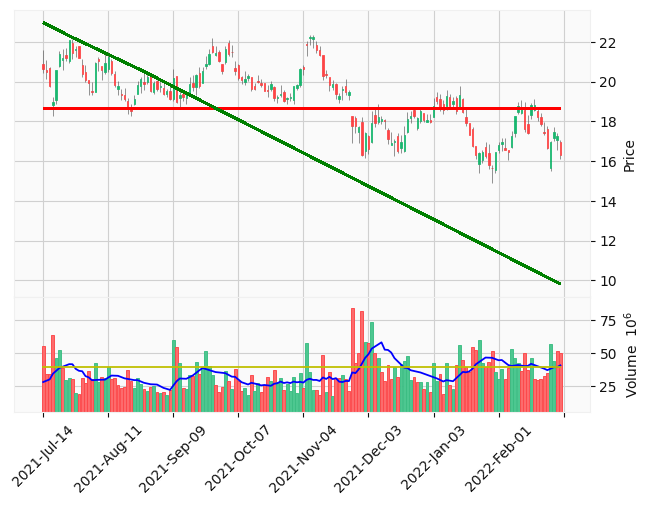

Done with : AAL
False
buy;  0
sell:  4
JPM


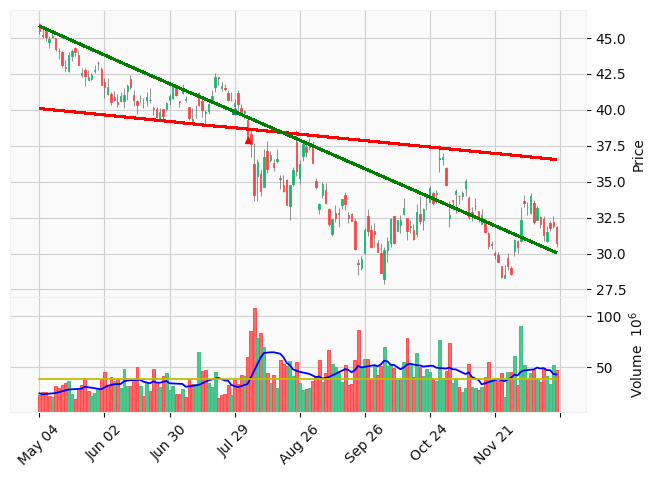

False
buy;  0
sell:  3
JPM


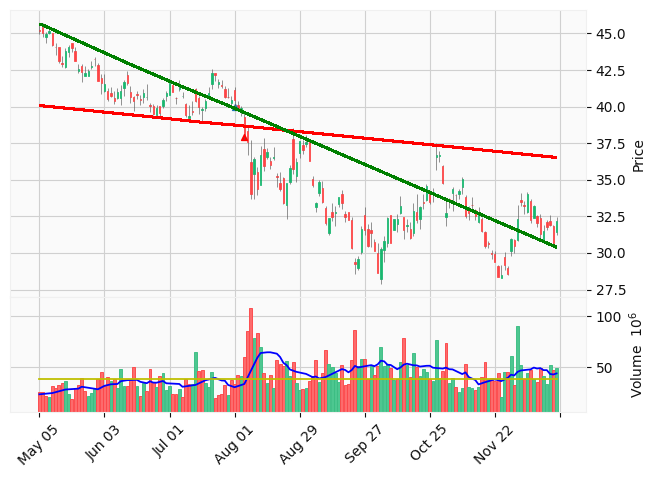

False
buy;  0
sell:  2
JPM


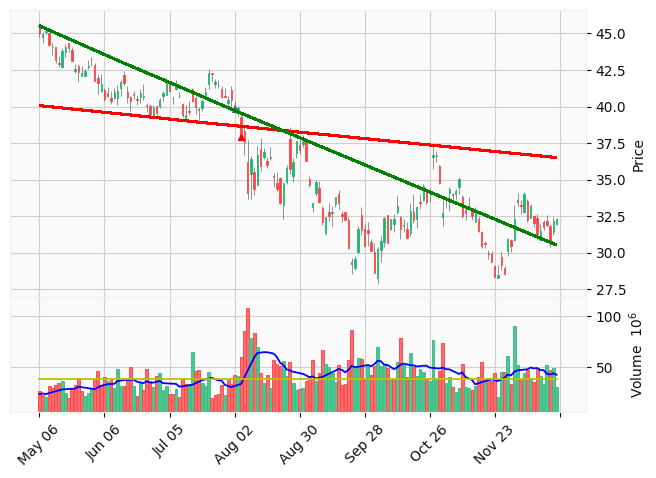

False
buy;  7
sell:  70
JPM


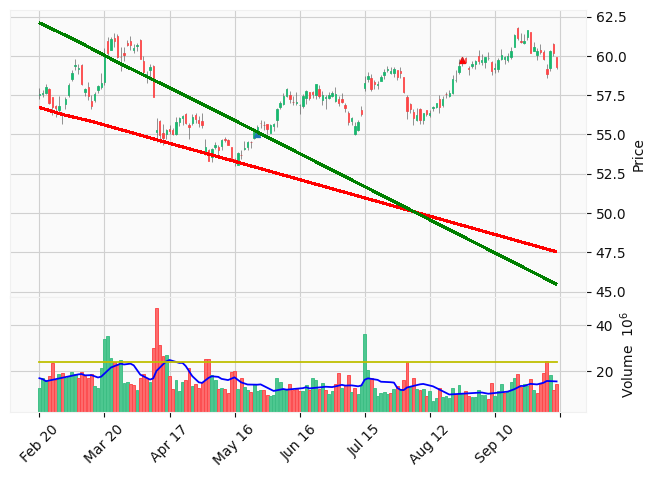

False
buy;  6
sell:  69
JPM


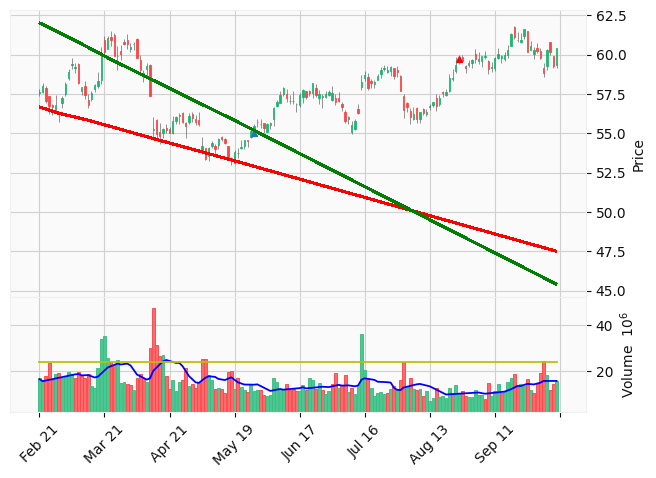

False
buy;  5
sell:  68
JPM


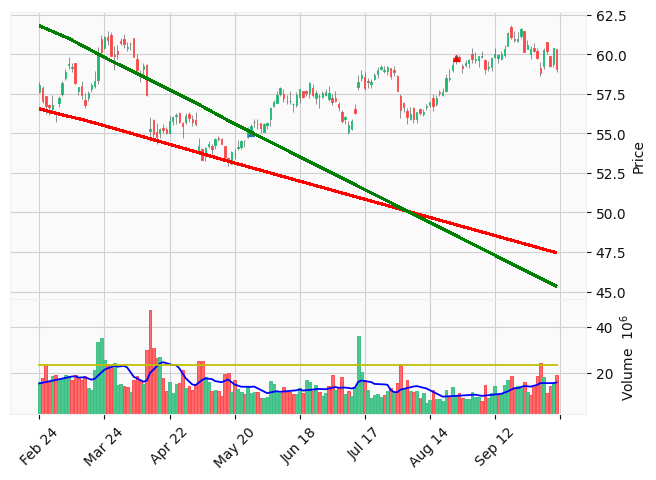

False
buy;  4
sell:  67
JPM


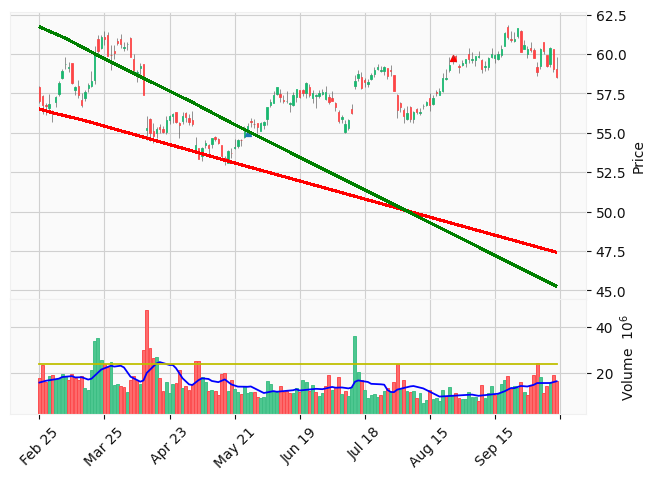

False
buy;  3
sell:  66
JPM


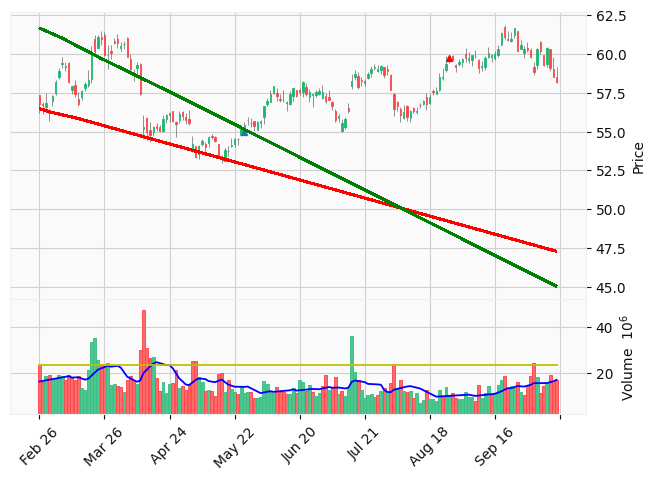

False
buy;  2
sell:  65
JPM


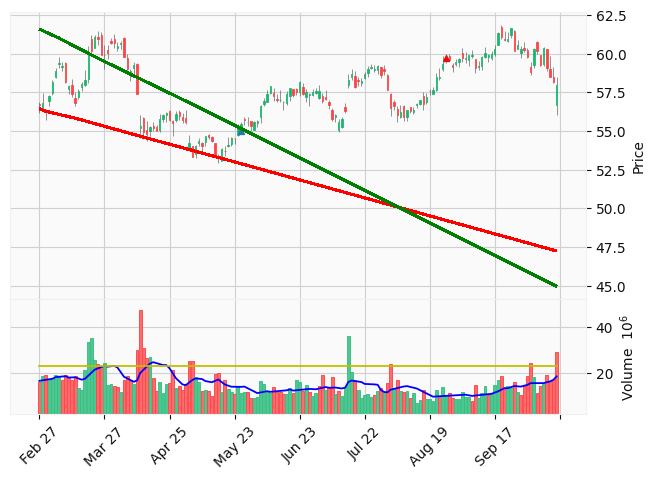

False
buy;  1
sell:  64
JPM


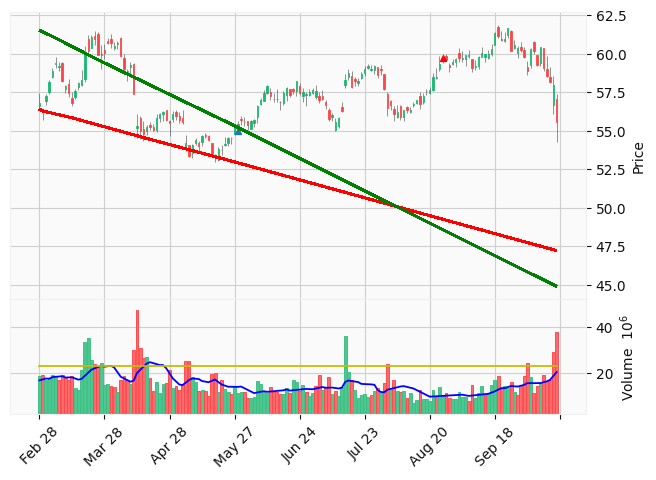

False
buy;  0
sell:  63
JPM


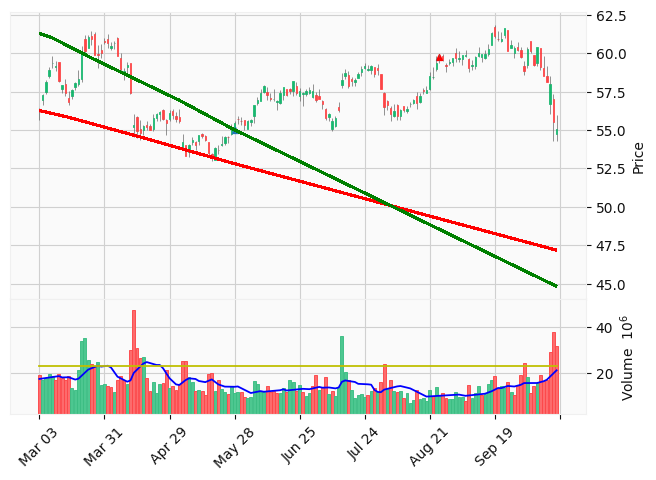

False
JPM


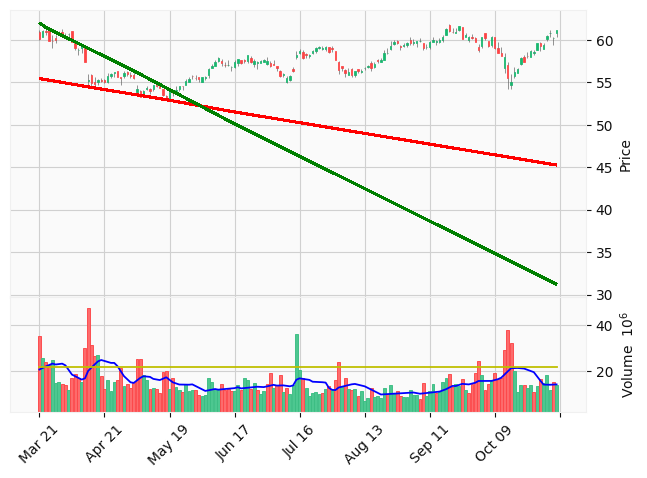

False
JPM


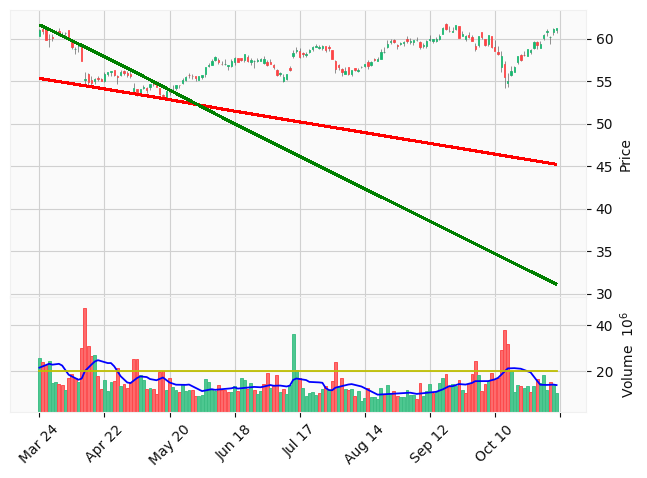

False
JPM


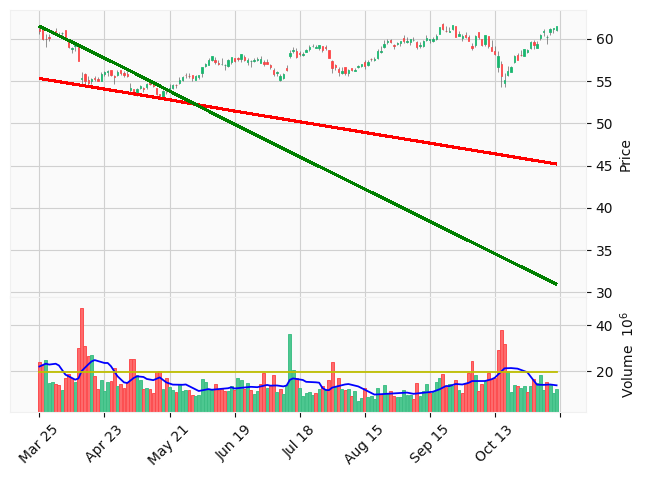

False
JPM


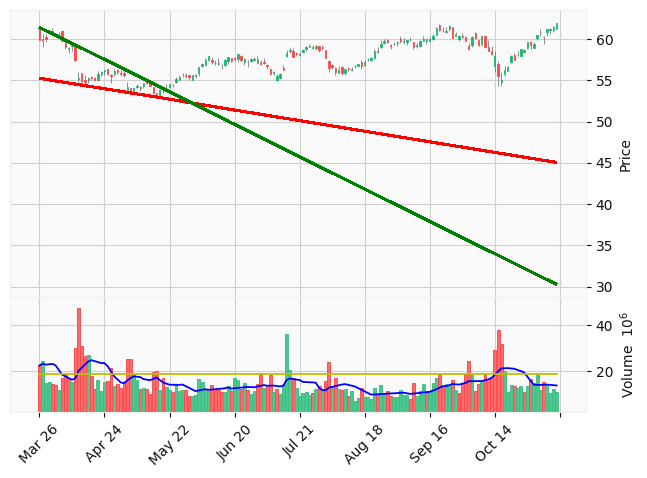

False
buy;  9
sell:  25
JPM


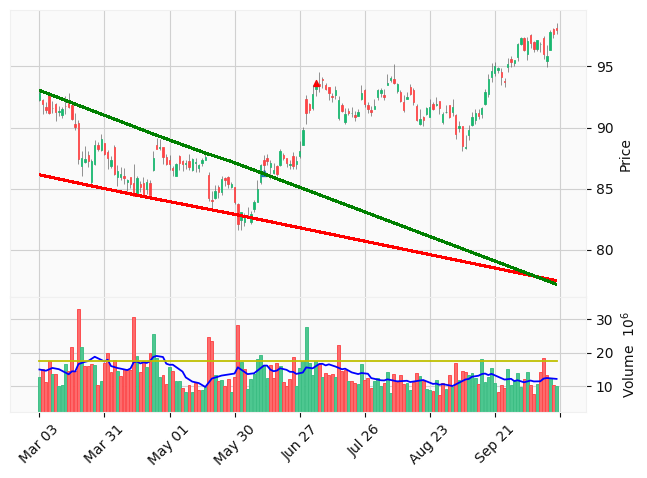

False
buy;  8
sell:  22
JPM


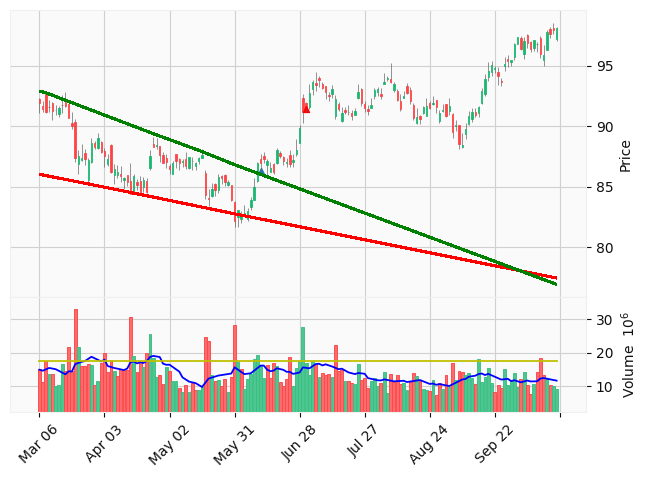

False
buy;  6
sell:  20
JPM


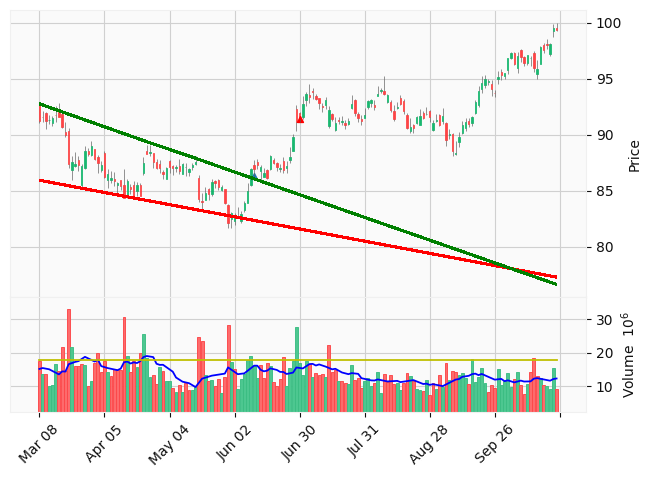

False
buy;  5
sell:  20
JPM


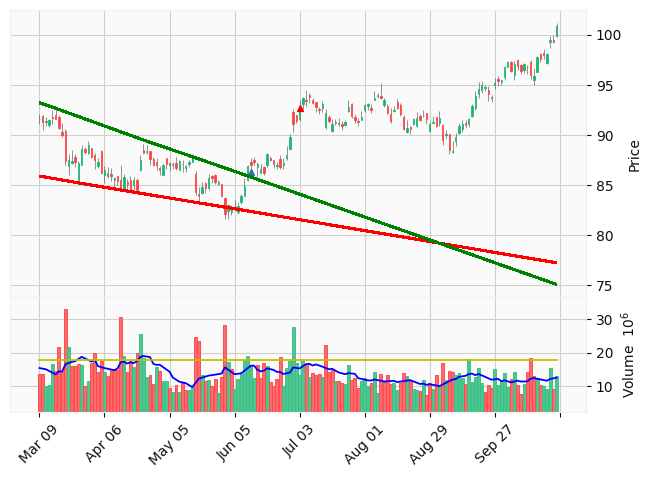

False
buy;  4
sell:  19
JPM


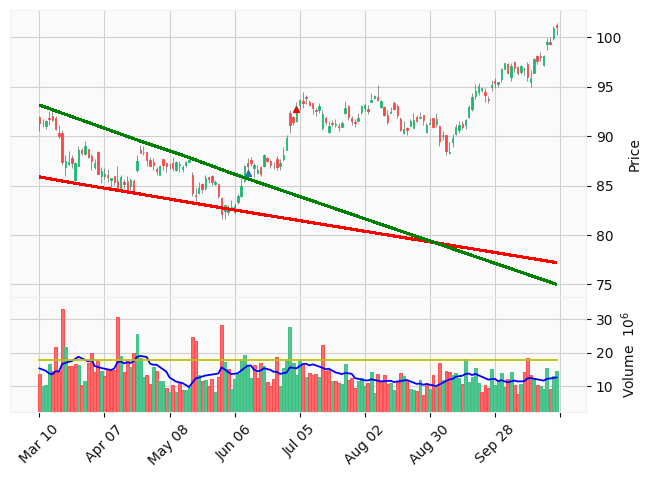

False
buy;  3
sell:  18
JPM


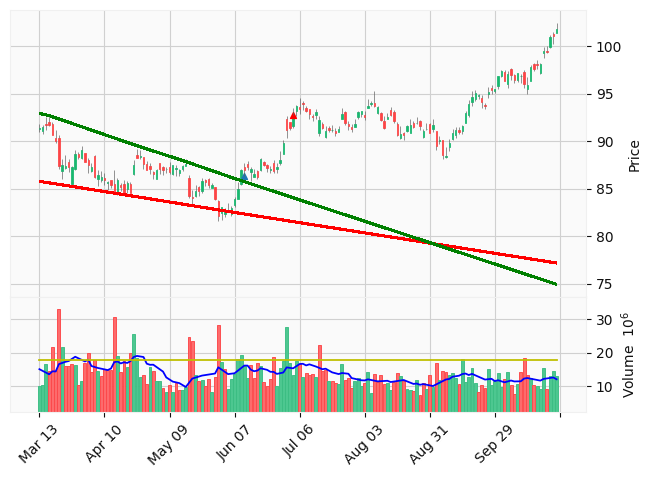

False
buy;  2
sell:  17
JPM


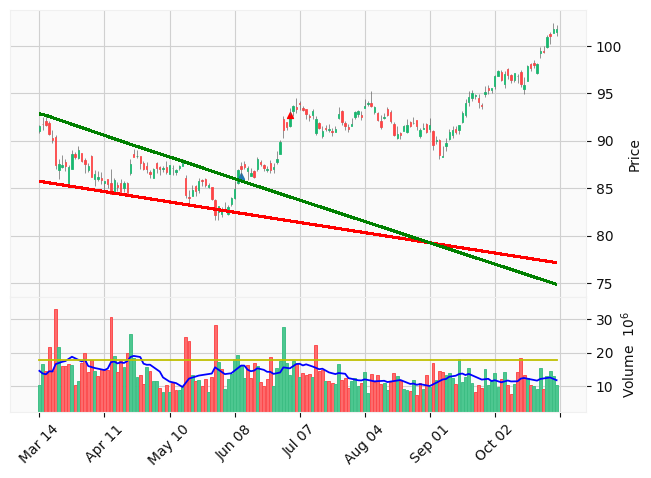

False
buy;  1
sell:  16
JPM


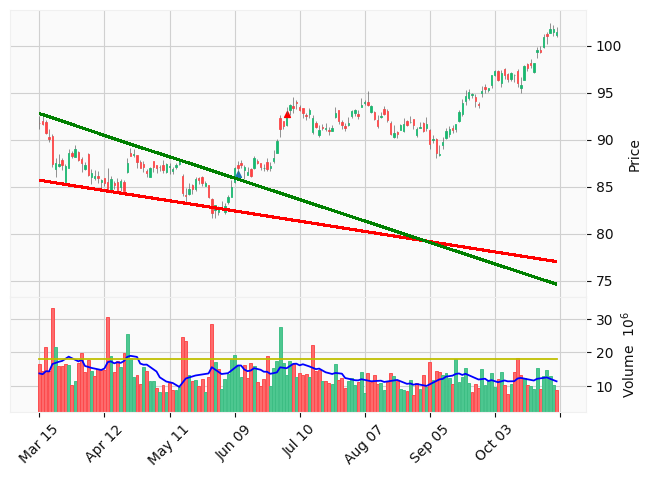

False
buy;  0
sell:  15
JPM


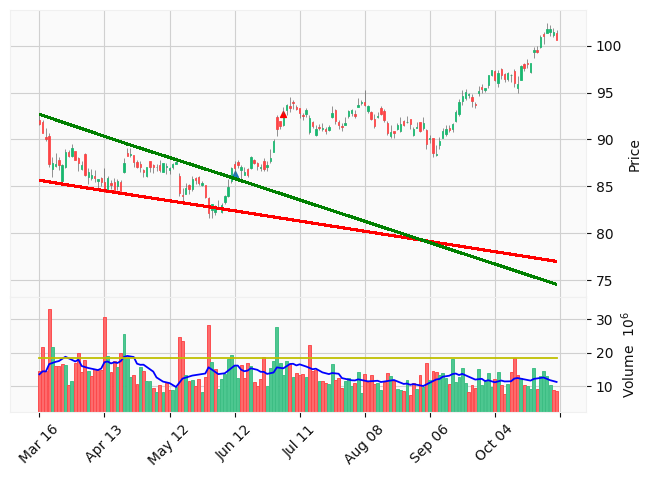

False
JPM


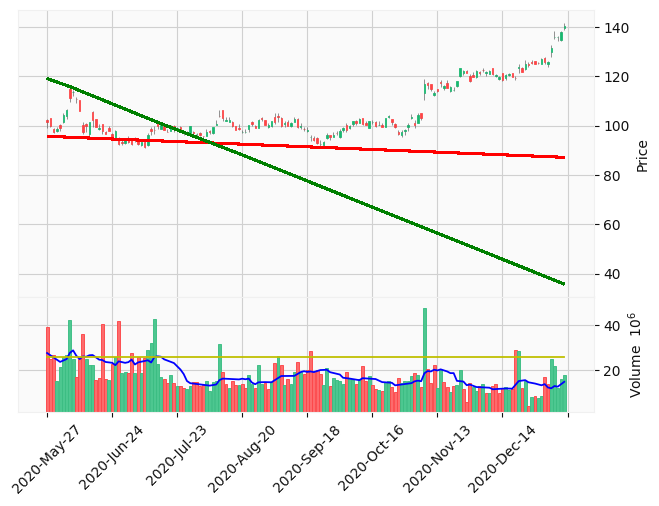

False
JPM


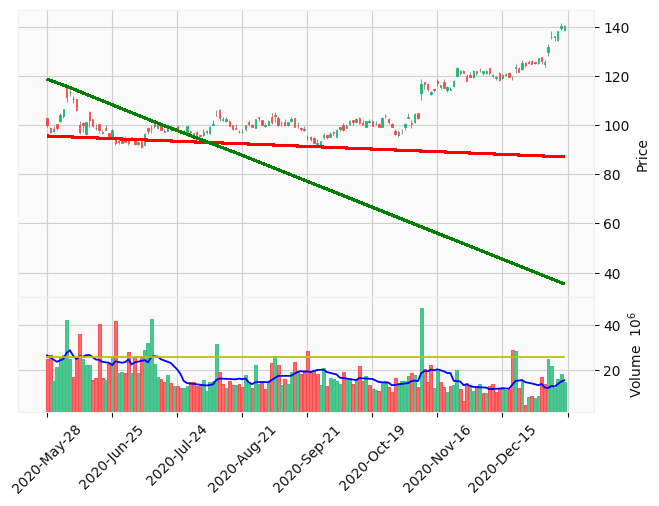

False
JPM


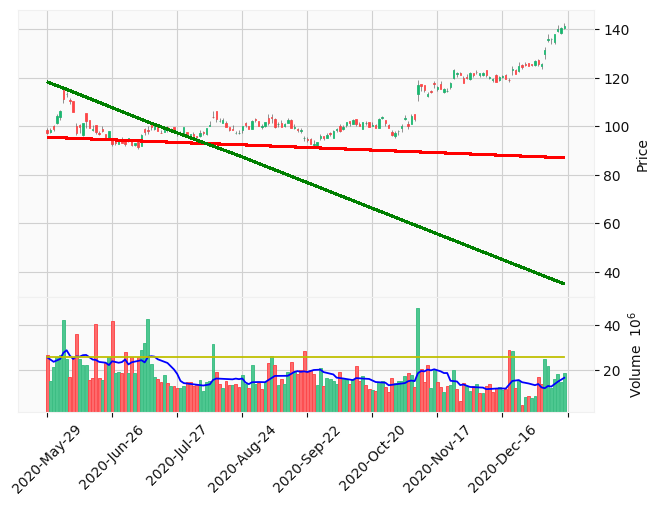

Done with : JPM
False
ORCL


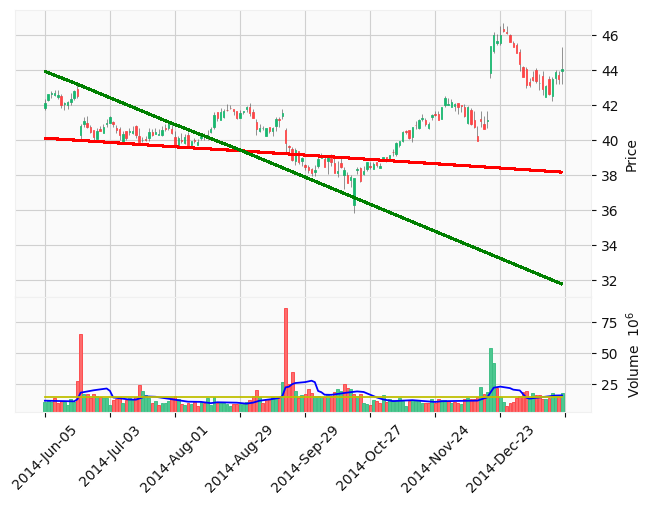

False
ORCL


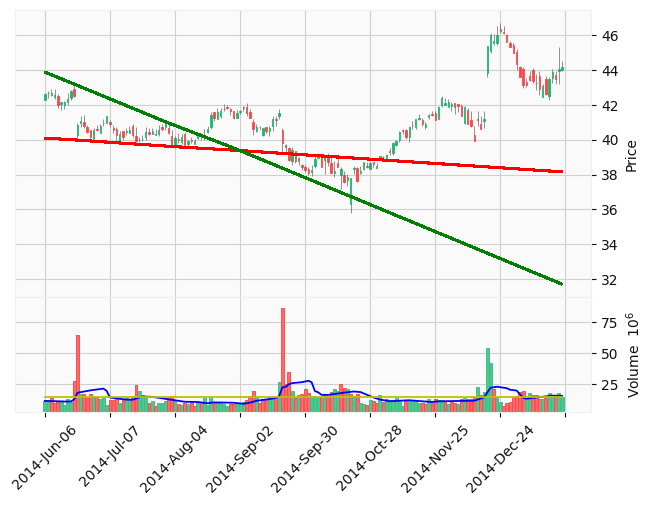

False
ORCL


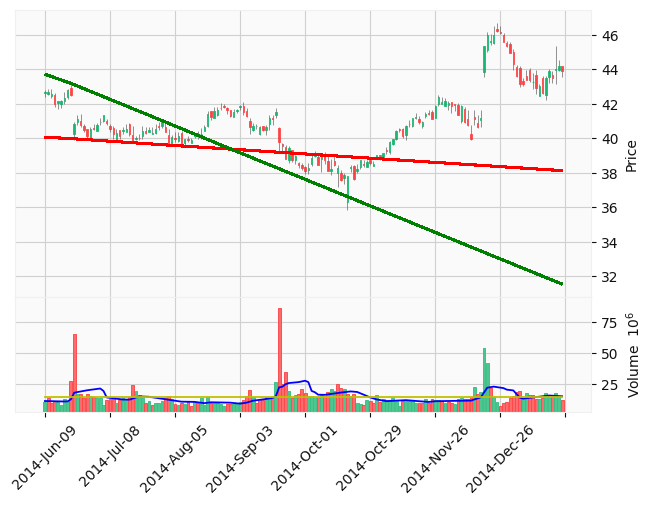

False
ORCL


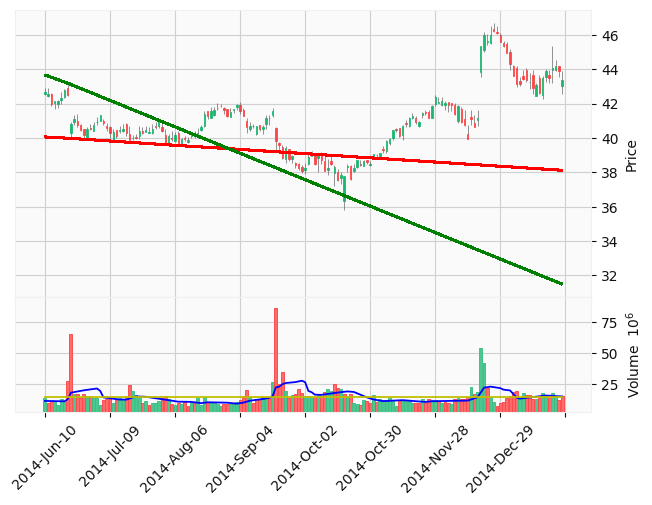

False
ORCL


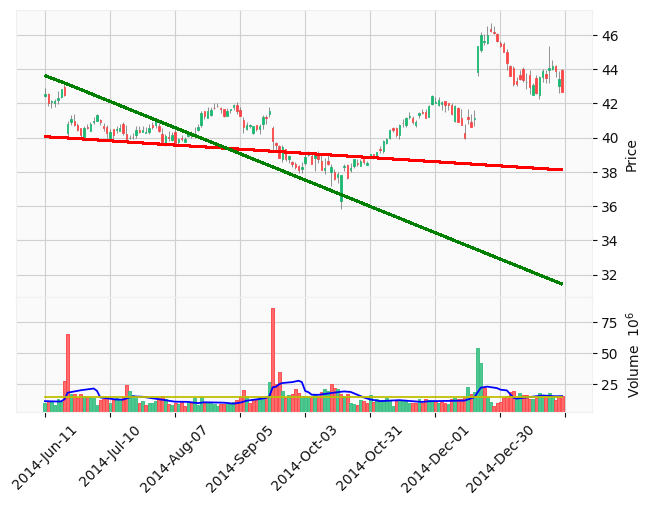

False
ORCL


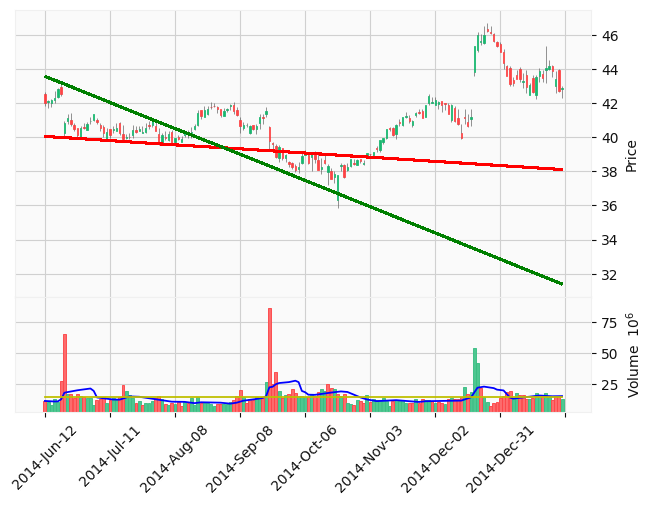

False
ORCL


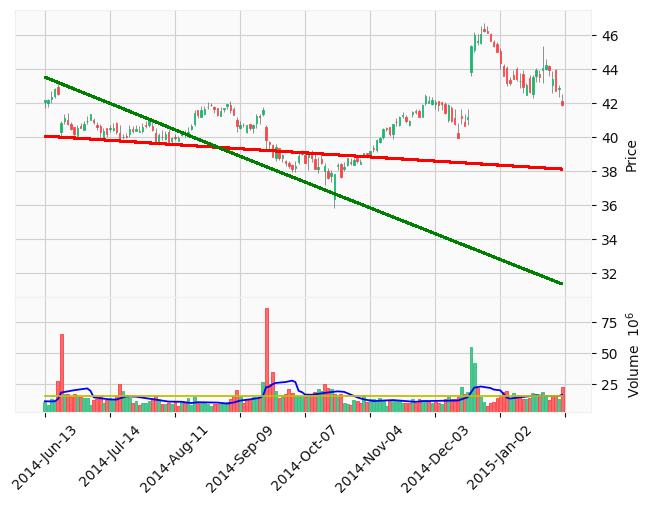

False
ORCL


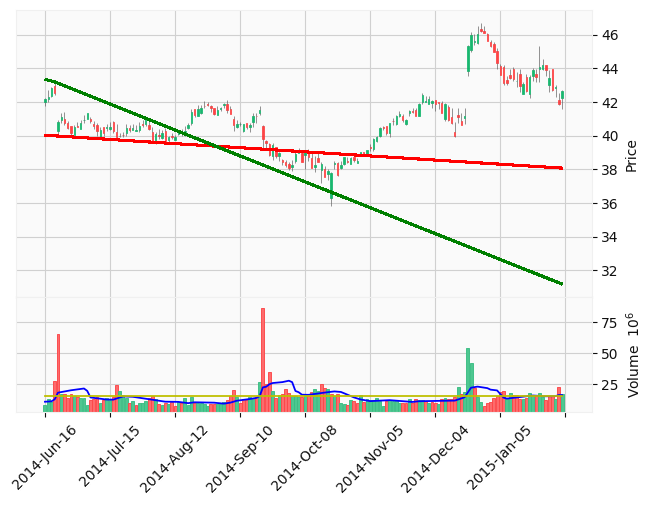

False
ORCL


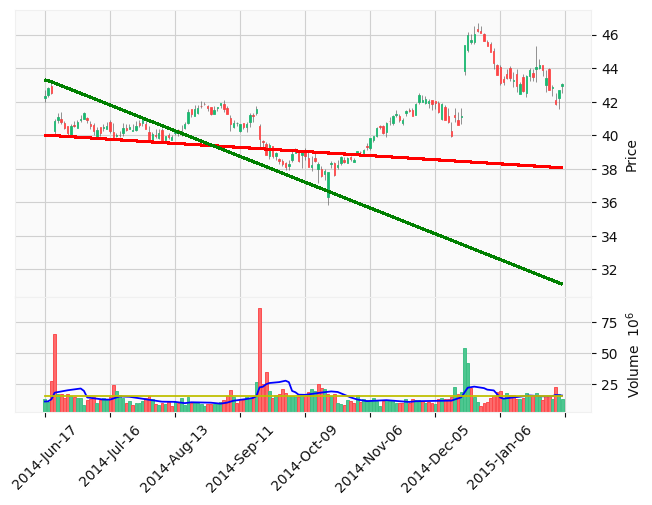

False
ORCL


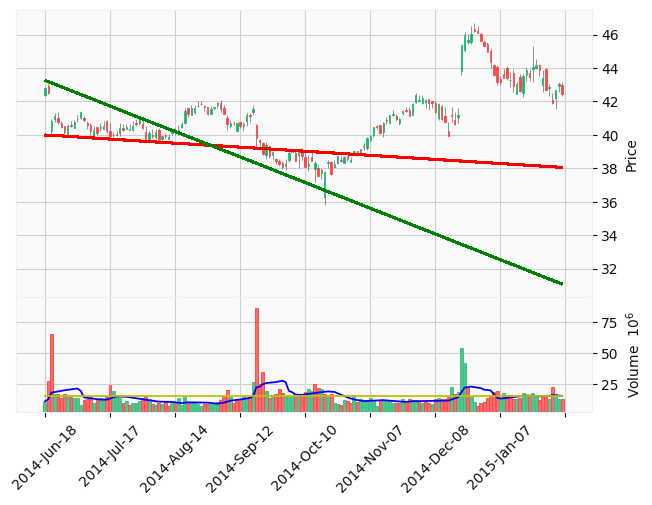

False
ORCL


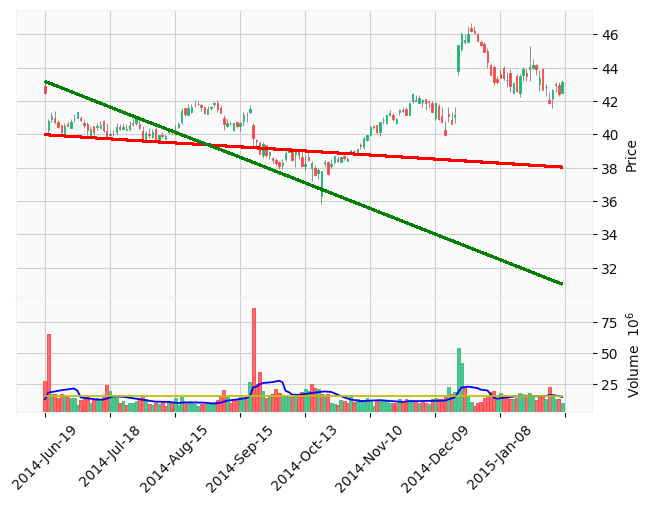

False
buy;  2
sell:  7
ORCL


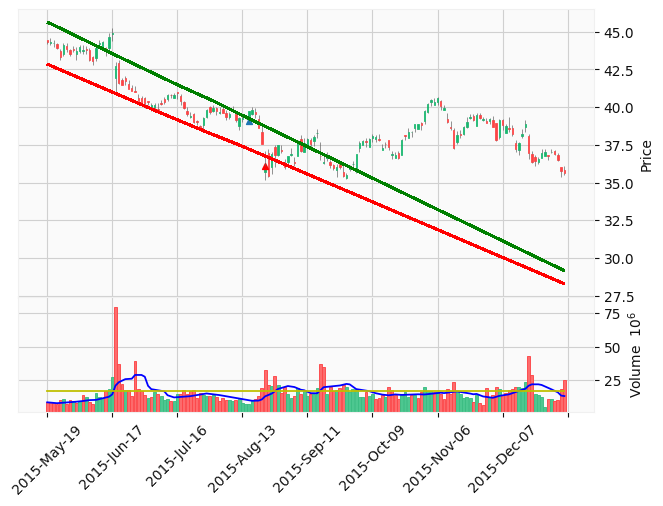

False
buy;  1
sell:  6
ORCL


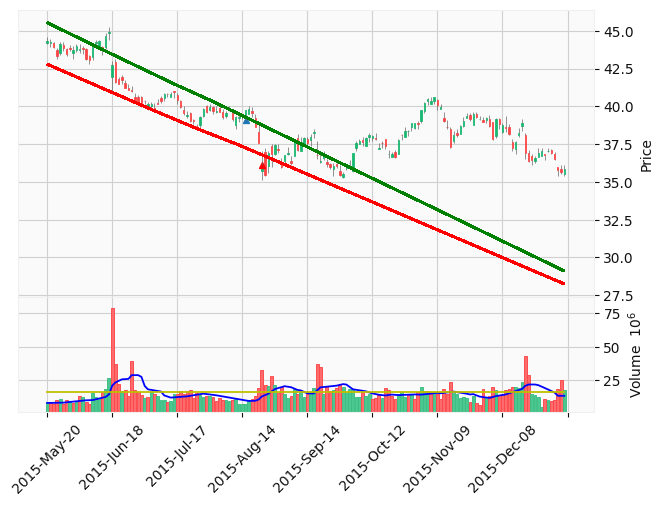

False
buy;  0
sell:  5
ORCL


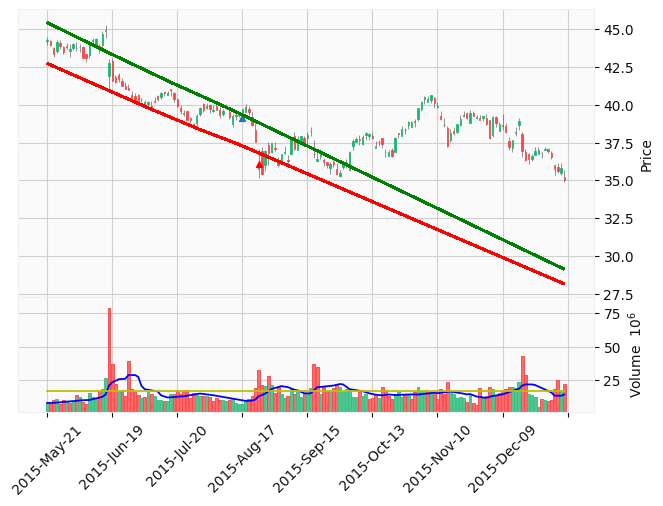

False
buy;  0
sell:  4
ORCL


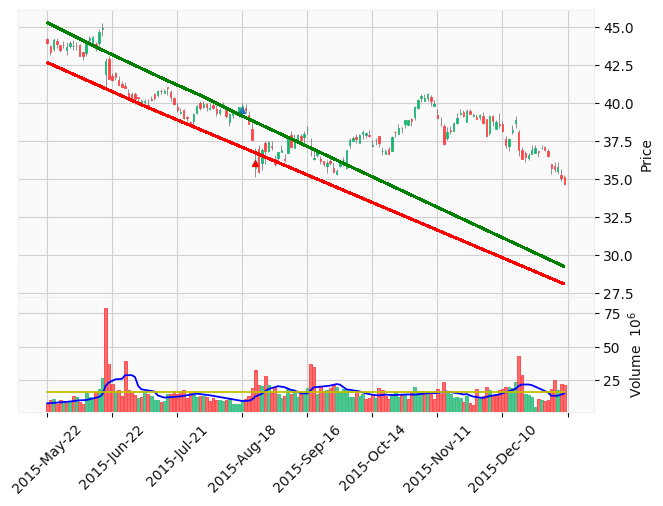

False
buy;  0
sell:  3
ORCL


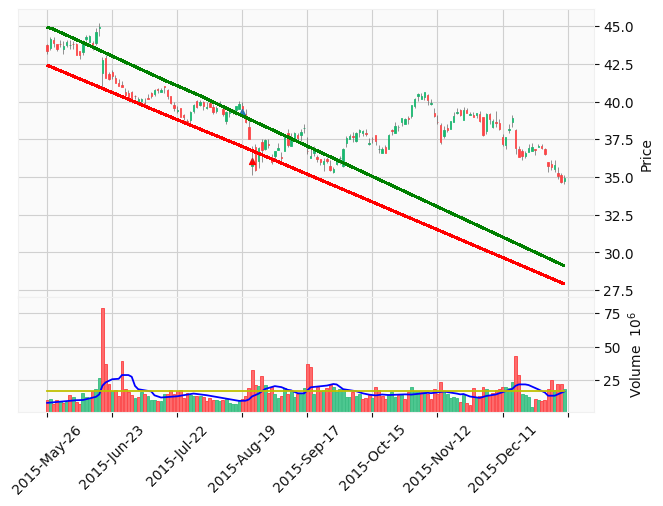

False
buy;  16
ORCL


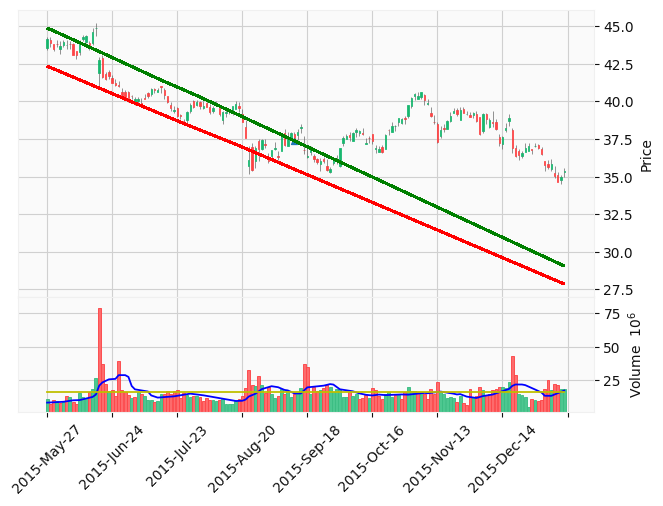

False
buy;  14
ORCL


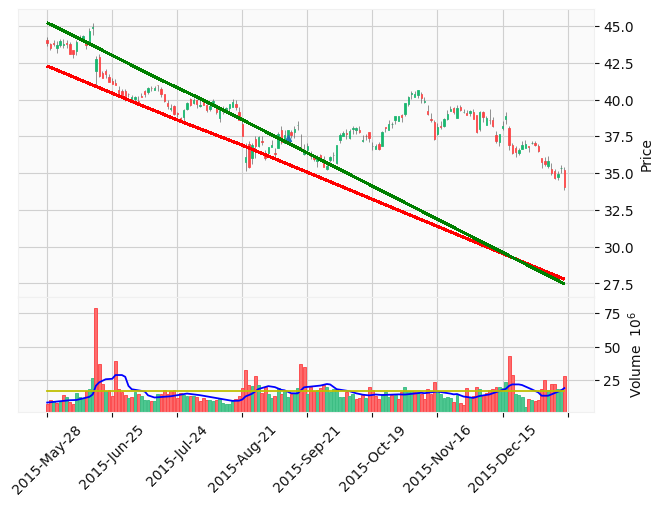

False
ORCL


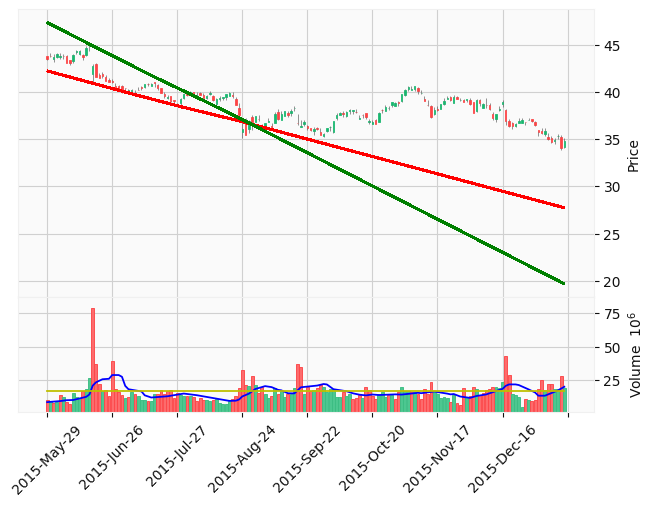

False
ORCL


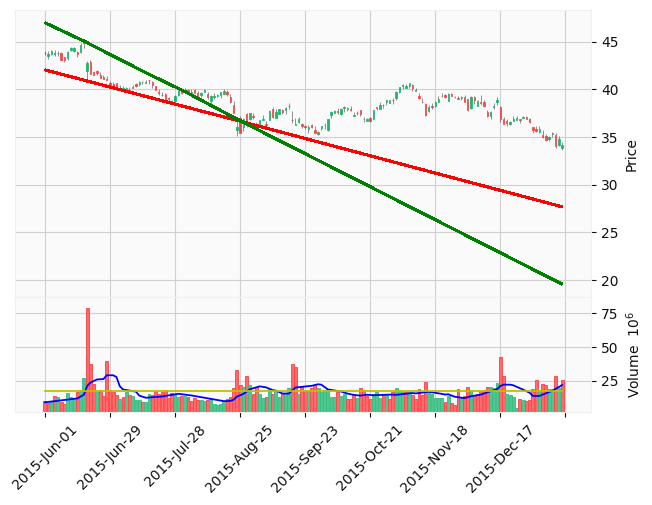

False
ORCL


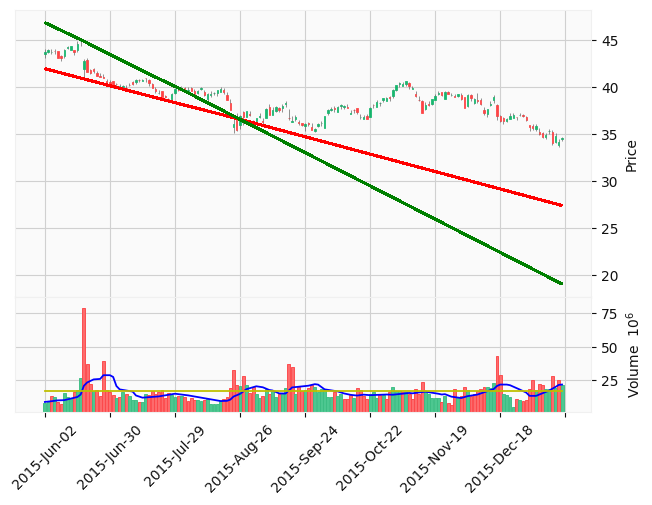

False
ORCL


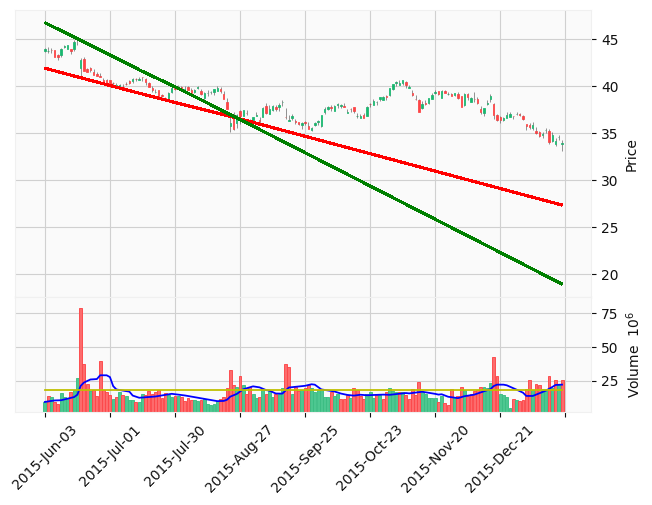

False
ORCL


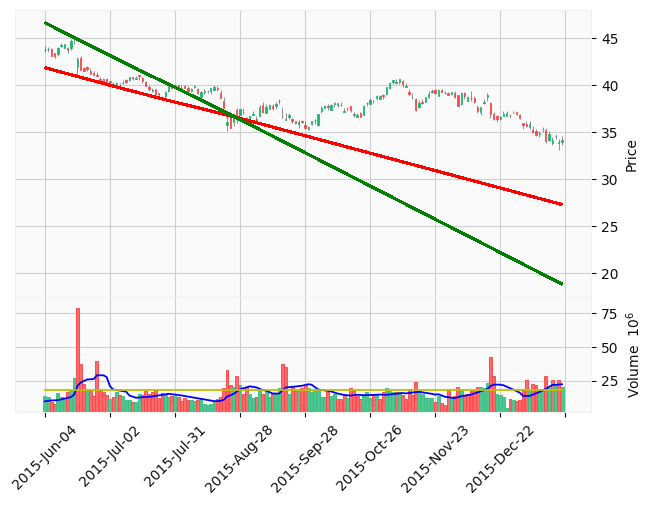

False
ORCL


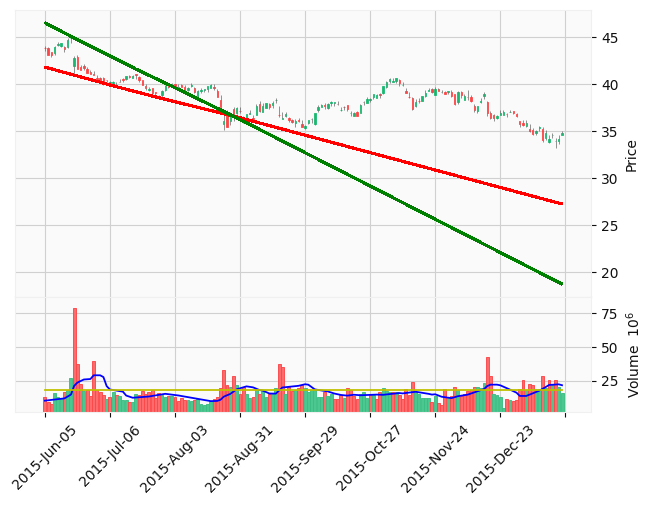

False
ORCL


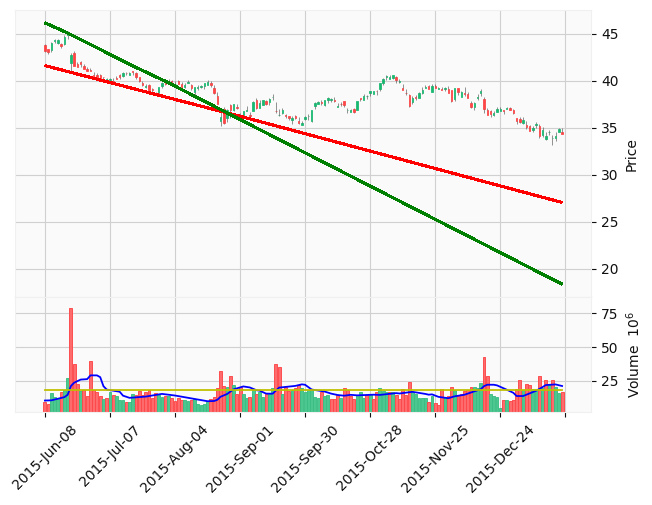

False
ORCL


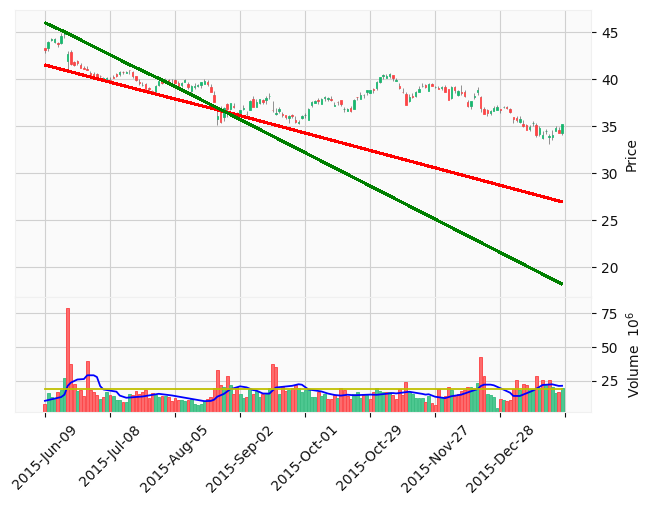

False
ORCL


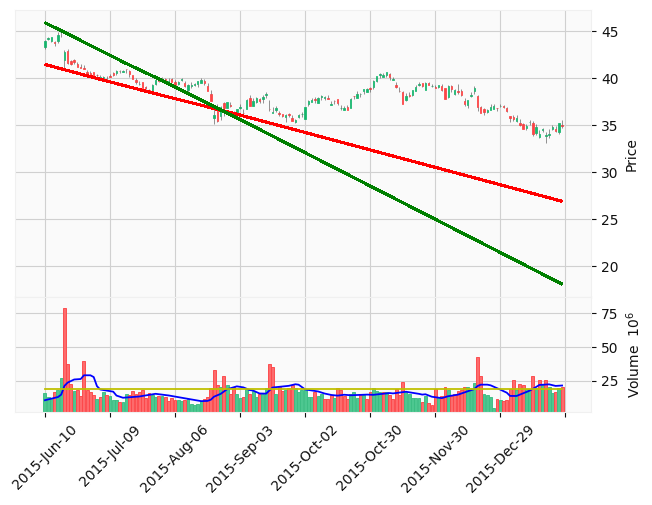

False
buy;  57
sell:  64
ORCL


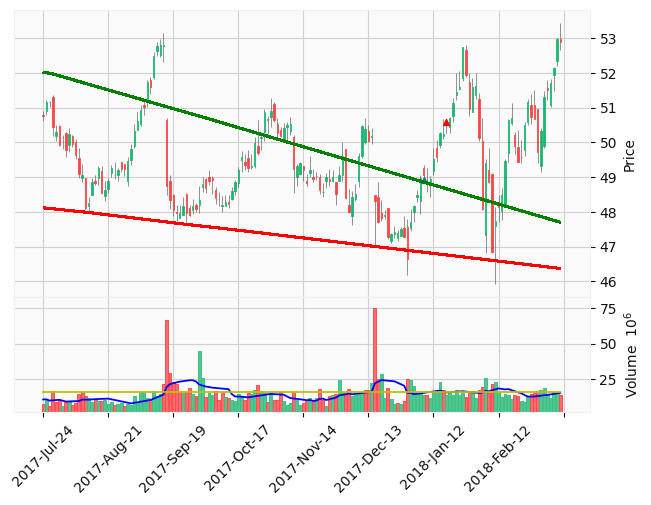

False
buy;  56
sell:  63
ORCL


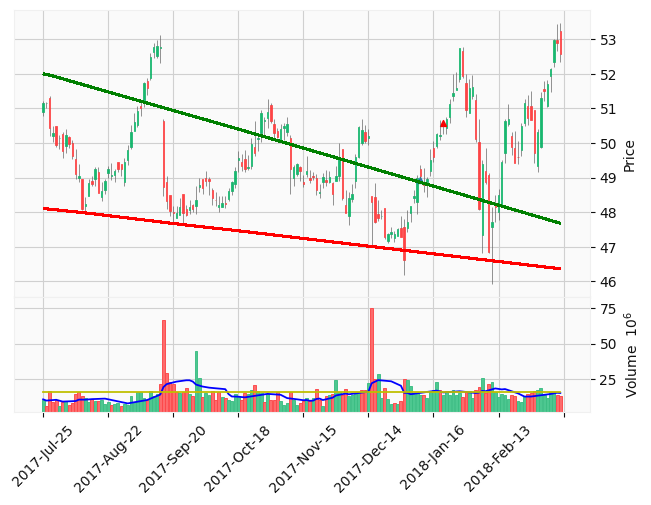

False
buy;  55
sell:  62
ORCL


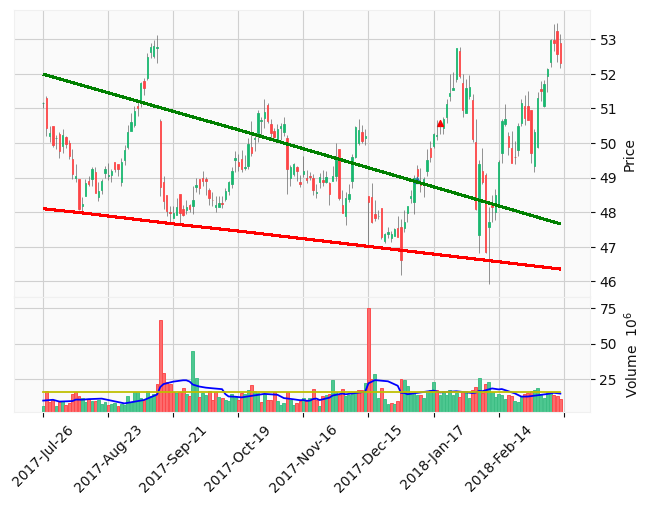

False
buy;  54
sell:  61
ORCL


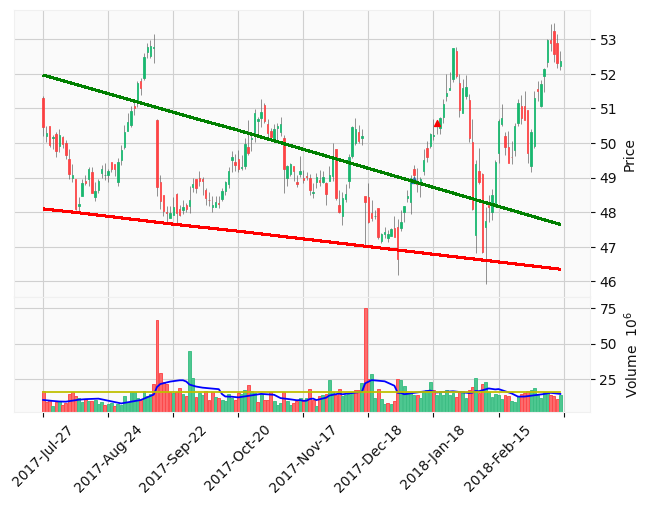

False
ORCL


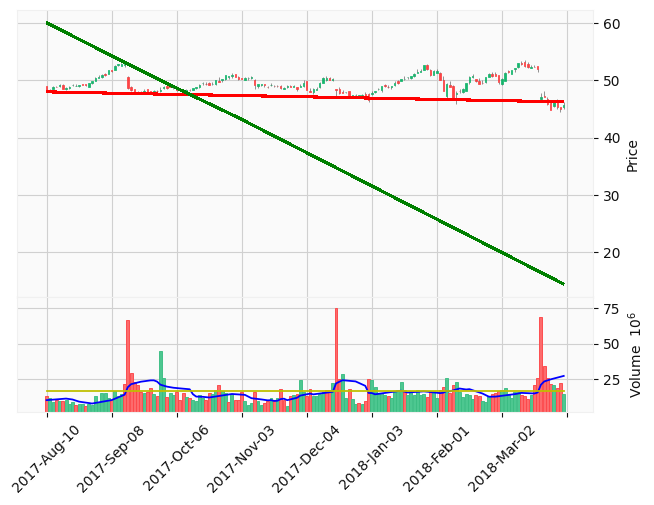

False
ORCL


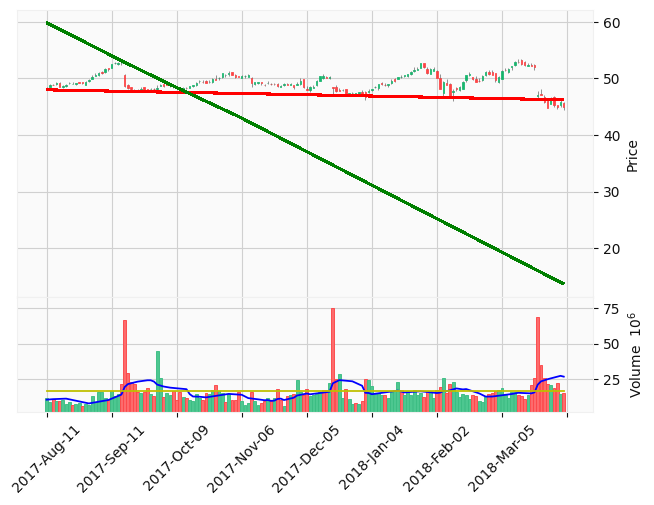

False
ORCL


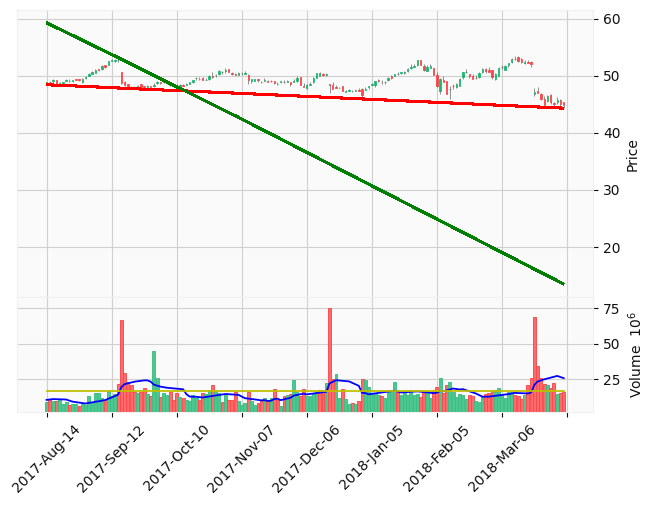

False
ORCL


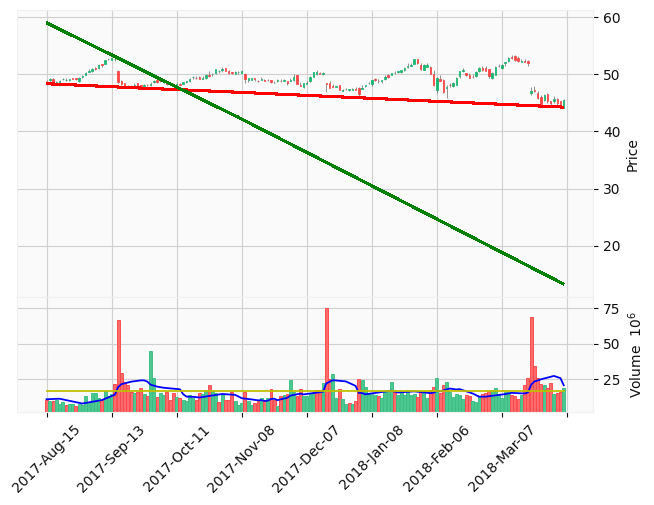

False
ORCL


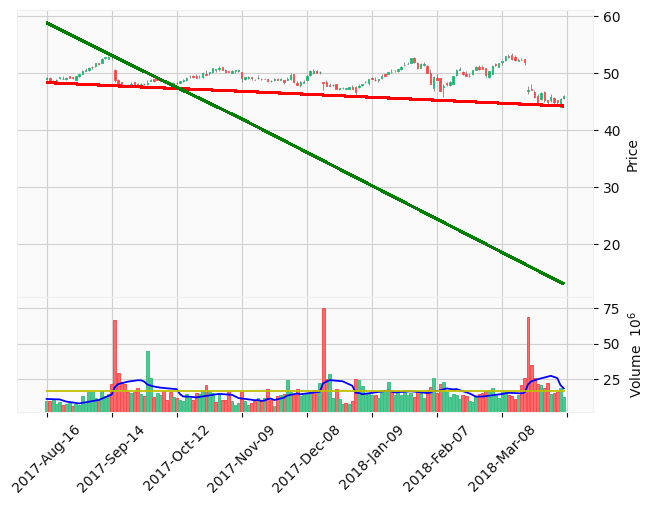

False
ORCL


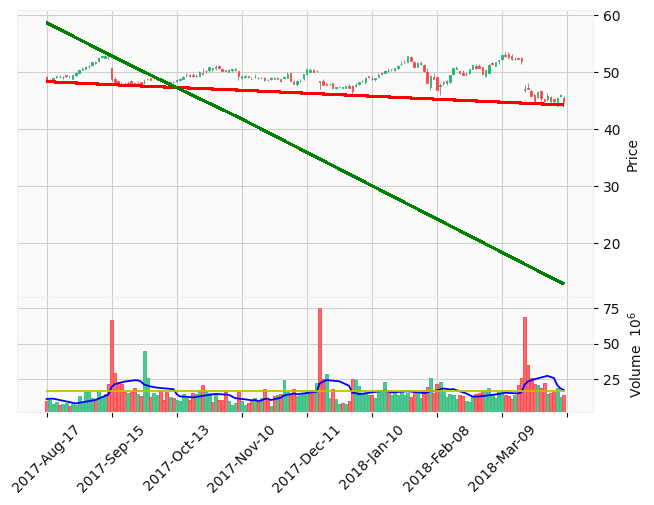

False
buy;  0
ORCL


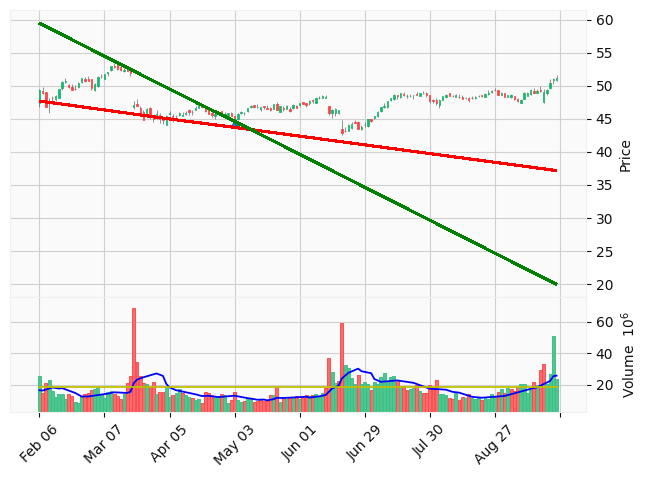

False
buy;  0
ORCL


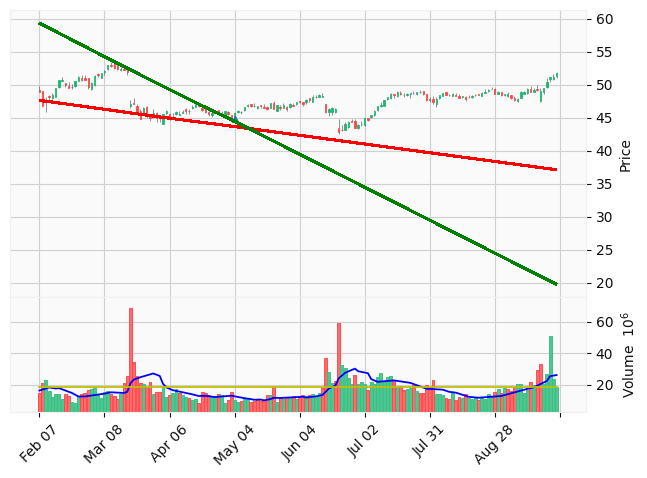

False
buy;  0
ORCL


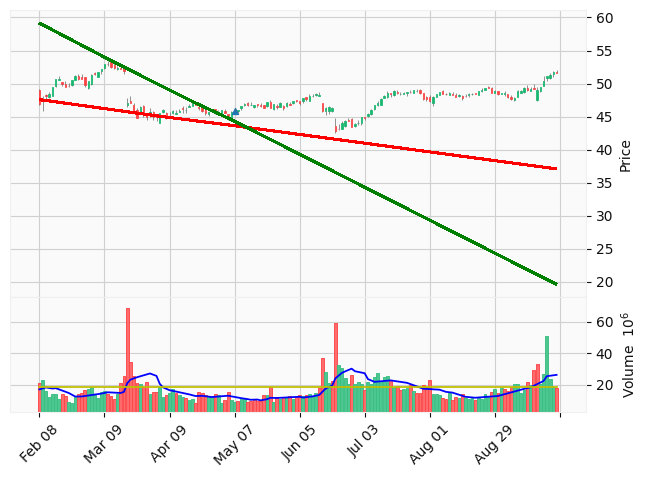

False
buy;  0
ORCL


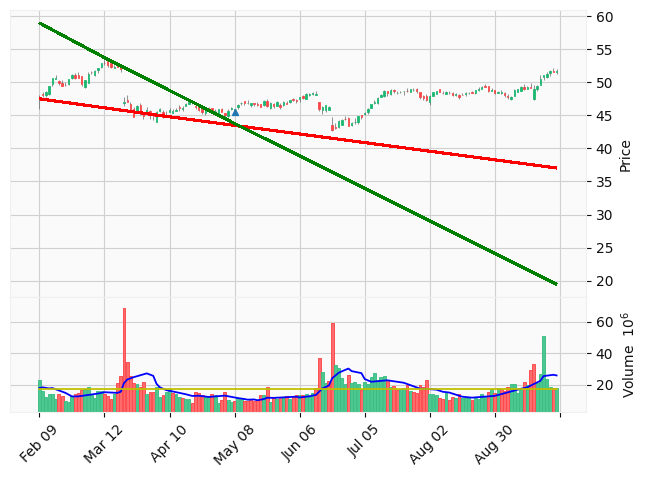

False
ORCL


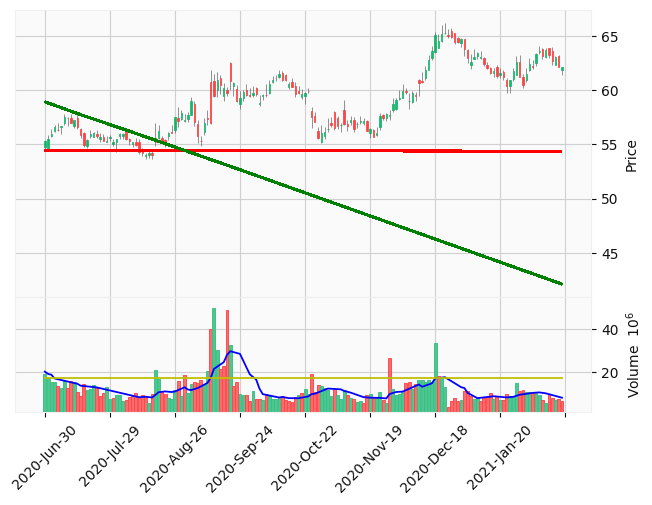

False
ORCL


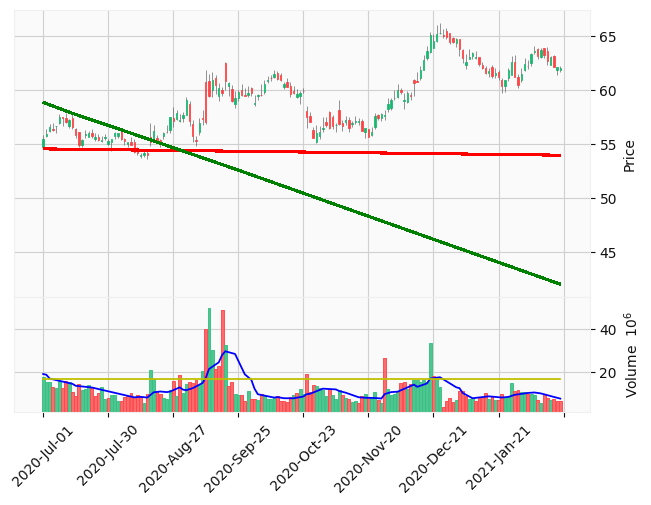

False
buy;  4
ORCL


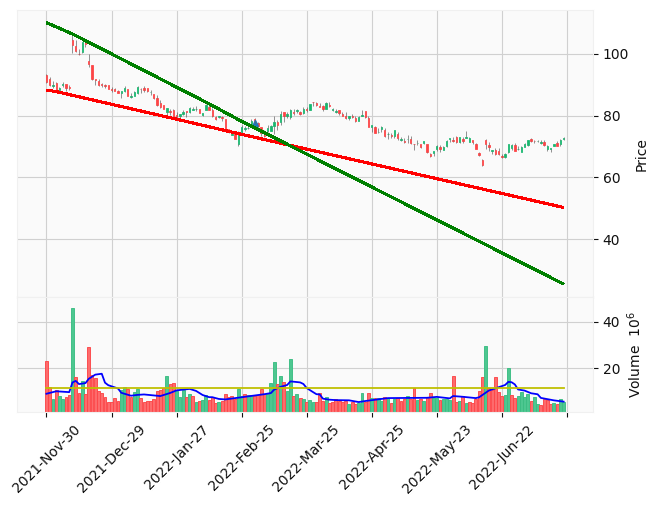

False
buy;  3
ORCL


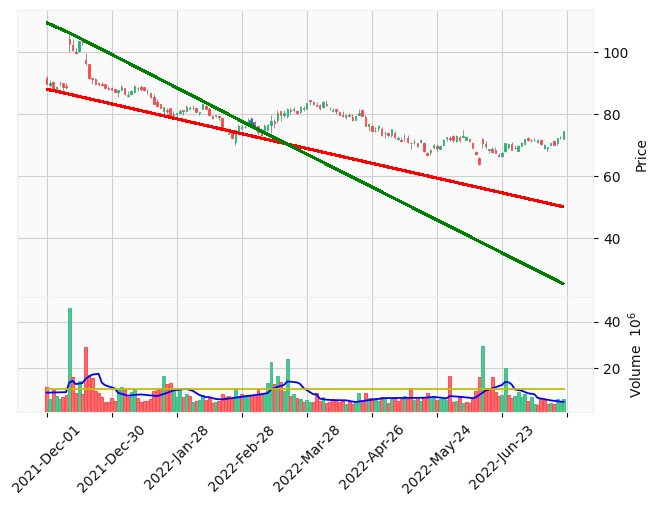

False
buy;  2
ORCL


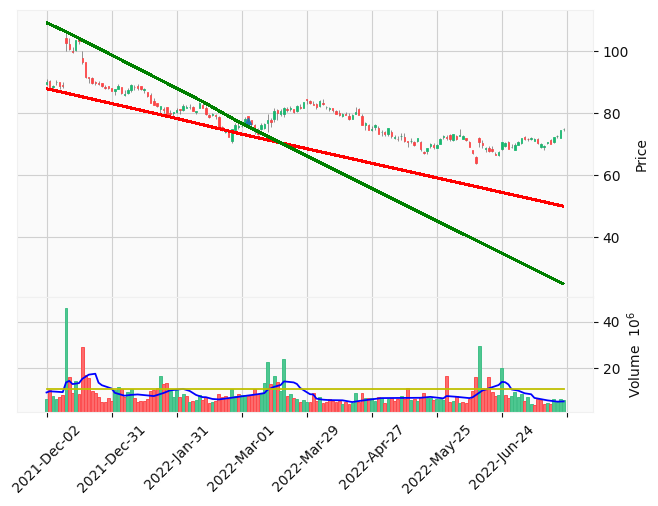

False
buy;  1
ORCL


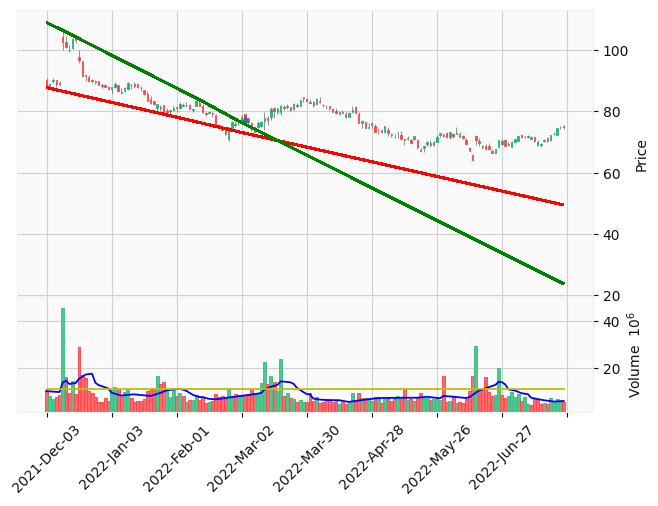

False
buy;  0
ORCL


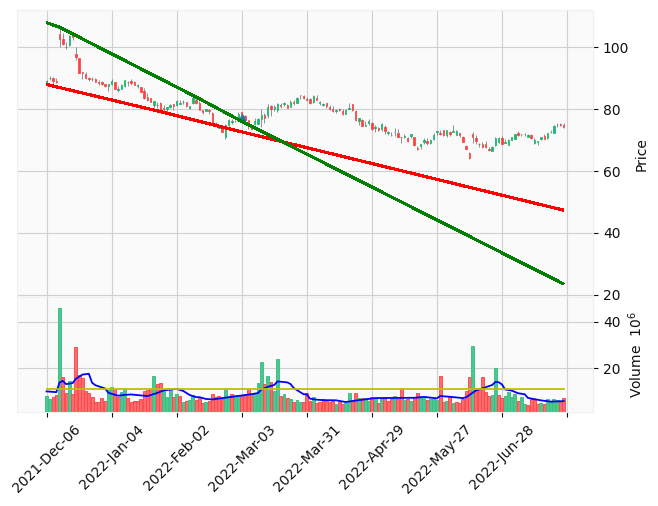

False
buy;  0
ORCL


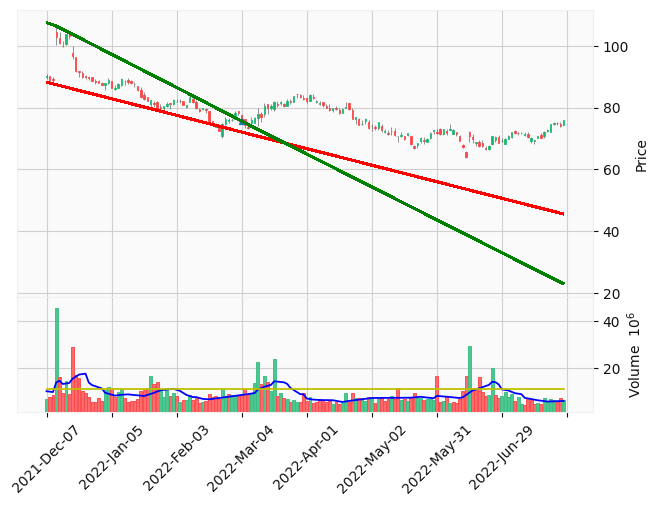

False
buy;  2
ORCL


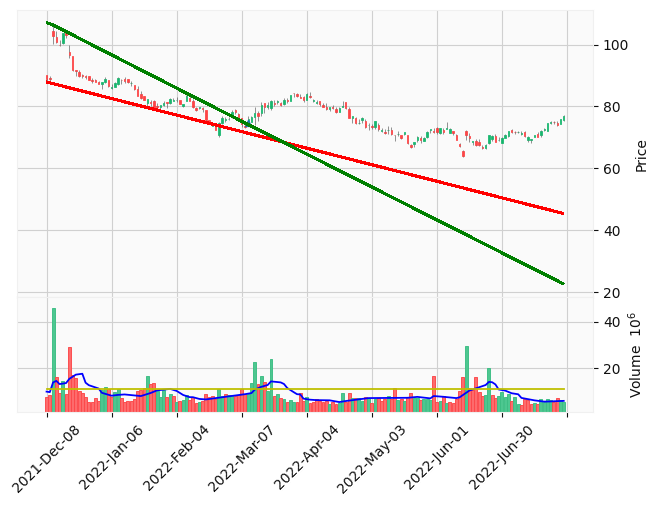

False
buy;  1
ORCL


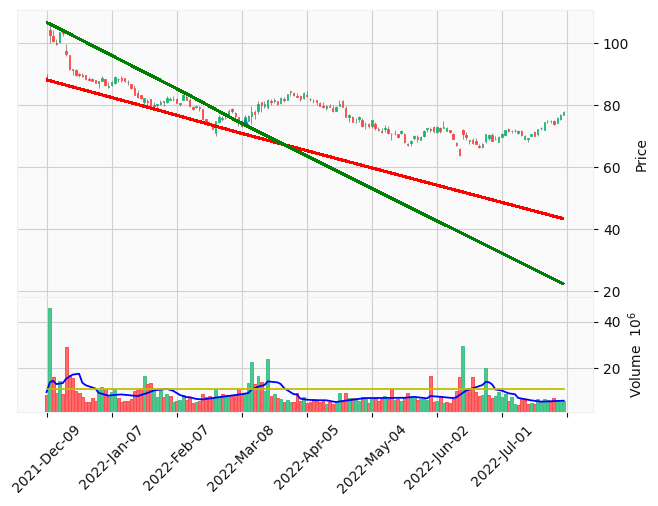

False
buy;  0
ORCL


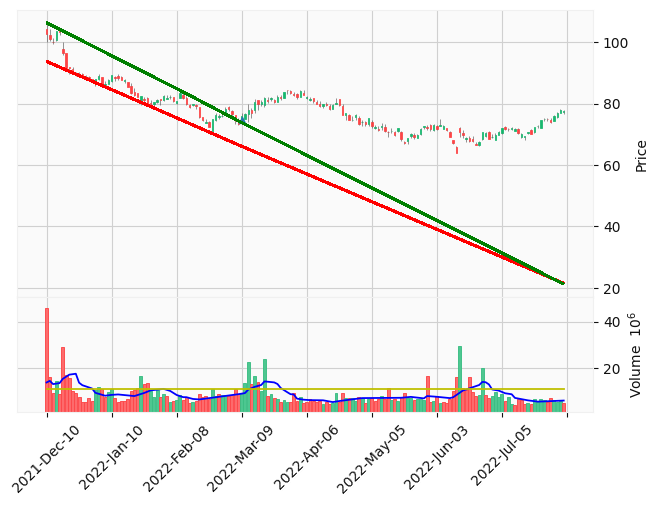

Done with : ORCL
Done


In [16]:
for ticker in ["AAL","JPM","ORCL"]:
    bars = client.get_price_history_every_day(ticker, need_extended_hours_data=False).json()['candles']
    for o in range(3000,155,-1):
        candles, adjustedcandles, adjustedcandleswindow = get_candles_with_volume_df(bars, window=60, vol_avg=10, offset=o, result_window=100)
        (_,_),dh,dl,(ha,la), (hb,lb), (highdates,lowdates) = draw_bands_df_vpc(adjustedcandles,interval='day',length=8, exmul = 20)
        '''and dl<.001 and dh<.001 and la>ha and ha/adjustedcandles.close.mean()<-.3'''
        highdates.sort()
        lowdates.sort()
        if (highdates!=np.array([0])).any() and (lowdates!=np.array([0])).any():
            highs = [adjustedcandleswindow.loc[mdates.num2date(x)] for x in highdates]
            lows = [adjustedcandleswindow.loc[mdates.num2date(x)] for x in lowdates]
            if ha<0 and la<0 and ha<la and (highs[1].high-lows[1].low)/(highs[-2].high-lows[-2].low)>2 and (highs[1].high-lows[1].low)*100>=lows[1].low:
                print(highs[1].datetime.date() == lows[1].datetime.date())
                highvol = adjustedcandles.volume.quantile(.8)
                hvol = mplf.make_addplot([highvol]*len(adjustedcandleswindow), color = 'y', panel= 1)
                breakout = False
                lasthigh = adjustedcandleswindow.loc[mdates.num2date(highdates[-2])]
                firsthigh = adjustedcandleswindow.loc[mdates.num2date(highdates[1])]
                highdates = np.append(highdates,[mdates.date2num(adjustedcandleswindow.iloc[-1].datetime)])
                lowdates = np.append(lowdates,[mdates.date2num(adjustedcandleswindow.iloc[-1].datetime)])
                aps = [hvol]
                for x in range(adjustedcandles.shape[0],adjustedcandleswindow.shape[0]-1):
                    date = adjustedcandleswindow.iloc[x].datetime
                    if point_above_line(date,adjustedcandleswindow.iloc[x].close,ha,hb) and point_above_line(date,adjustedcandleswindow.iloc[x].open,ha,hb) and max(adjustedcandleswindow.iloc[x-40:x].volume)>highvol and  not breakout and (ha*mdates.date2num(adjustedcandleswindow.iloc[x].datetime)+hb)>(la*mdates.date2num(adjustedcandleswindow.iloc[x].datetime)+lb) and adjustedcandleswindow.iloc[x].close<=lasthigh.high:
                        breakout = True
                        marklist = [np.nan]*adjustedcandleswindow.shape[0]
                        marklist[x] = adjustedcandleswindow.iloc[x].low
                        marker = mplf.make_addplot(marklist,marker = '^',panel=0, type='scatter')
                        aps.append(marker)
                        print("buy; ",x-adjustedcandles.shape[0])
                        for y in range(x,adjustedcandleswindow.shape[0]):
                            if adjustedcandleswindow.iloc[y].close>firsthigh.close or point_below_line(adjustedcandleswindow.iloc[y].datetime,adjustedcandleswindow.iloc[y].close,la,lb):
                                sellMarkList = [np.nan]*adjustedcandleswindow.shape[0]
                                sellMarkList[y] = adjustedcandleswindow.iloc[y].close
                                sellMarker =  mplf.make_addplot(sellMarkList,marker = '^',panel=0, type='scatter', color = 'r')
                                aps.append(sellMarker)
                                print("sell: ",y-adjustedcandles.shape[0])
                                break
                        break
                print(ticker)
                plot_lines(adjustedcandleswindow,ha,hb,la,lb,highdates,lowdates,aps)
    print("Done with : "+ticker)
print("Done")

Rising Wedge Finder

In [ ]:
for ticker in ["AMZN"]:
    bars = client.get_price_history_every_minute(ticker, need_extended_hours_data=False).json()['candles']
    for o in range(2000,155,-1):
        candles, adjustedcandles, adjustedcandleswindow = get_candles_with_volume_df(bars, window=55, vol_avg=10, offset=o, result_window=100)
        (_,_),dh,dl,(ha,la), (hb,lb), (highdates,lowdates) = draw_bands_df_vpc(adjustedcandles,interval='min',length=8, exmul = 20)
        '''and dl<.001 and dh<.001 and la>ha and ha/adjustedcandles.close.mean()<-.3'''
        highdates.sort()
        lowdates.sort()
        if (highdates!=np.array([0])).any() and (lowdates!=np.array([0])).any():
            highs = [adjustedcandleswindow.loc[mdates.num2date(x)] for x in highdates]
            lows = [adjustedcandleswindow.loc[mdates.num2date(x)] for x in lowdates]
            if la>ha and ha>0 and dl<.009 and dh<.009 and (highs[1].high-lows[1].low)/(highs[-2].high-lows[-2].low)>2:
                print(highs[1].datetime.date() == lows[1].datetime.date())
                highvol = adjustedcandles.iloc[-10:].volume.quantile(.8)
                hvol = mplf.make_addplot([highvol]*len(adjustedcandleswindow), color = 'y', panel= 1)
                breakout = False
                lasthigh = adjustedcandleswindow.loc[mdates.num2date(highdates[-2])]
                firsthigh = adjustedcandleswindow.loc[mdates.num2date(highdates[1])]
                lastlow = adjustedcandleswindow.loc[mdates.num2date(lowdates[-2])]
                firstlow = adjustedcandleswindow.loc[mdates.num2date(lowdates[1])]
                highdates = np.append(highdates,[mdates.date2num(adjustedcandleswindow.iloc[-1].datetime)])
                lowdates = np.append(lowdates,[mdates.date2num(adjustedcandleswindow.iloc[-1].datetime)])
                aps = [hvol]
                for x in range(adjustedcandles.shape[0],adjustedcandles.shape[0]+40):
                    date = adjustedcandleswindow.iloc[x].datetime
                    if point_below_line(date,adjustedcandleswindow.iloc[x].close,la,lb) and point_below_line(date,adjustedcandleswindow.iloc[x].open,la,lb) and max(adjustedcandleswindow.iloc[x-40:x].volume)>highvol and  not breakout and (ha*mdates.date2num(adjustedcandleswindow.iloc[x].datetime)+hb)>(la*mdates.date2num(adjustedcandleswindow.iloc[x].datetime)+lb) and adjustedcandleswindow.iloc[x].close>=lastlow.high:
                        breakout = True
                        marklist = [np.nan]*adjustedcandleswindow.shape[0]
                        marklist[x] = adjustedcandleswindow.iloc[x].low
                        marker = mplf.make_addplot(marklist,marker = '^',panel=0, type='scatter')
                        aps.append(marker)
                        print("buy; ",x-adjustedcandles.shape[0])
                        for y in range(x,adjustedcandleswindow.shape[0]):
                            if adjustedcandleswindow.iloc[y].close<firstlow.close or point_above_line(adjustedcandleswindow.iloc[y].datetime,adjustedcandleswindow.iloc[y].close,ha,hb):
                                sellMarkList = [np.nan]*adjustedcandleswindow.shape[0]
                                sellMarkList[y] = adjustedcandleswindow.iloc[y].close
                                sellMarker =  mplf.make_addplot(sellMarkList,marker = '^',panel=0, type='scatter', color = 'r')
                                aps.append(sellMarker)
                                print("sell: ",y-adjustedcandles.shape[0])
                                break
                        break
                print(ticker)
                plot_lines(adjustedcandleswindow,ha,hb,la,lb,highdates,lowdates,aps)
    print("Done with : "+ticker)
print("Done")

In [ ]:
bars = client.get_price_history_every_minute("AAL", need_extended_hours_data=False).json()['candles']
candles, adjustedcandles, adjustedcandleswindow = get_candles_with_volume_df(bars, window=55, vol_avg=2, offset=505, result_window=40)
draw_bands_df_vpc(adjustedcandles, adjustedcandleswindow,interval='min',length=7, exmul = 20, verbose = True, vol_pct=.95)